# Assignment 1.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shapefile as shp
import urllib, gdal, subprocess
import json
import requests
import folium
import datetime
import warnings
warnings.filterwarnings("ignore")

sns.set(style='darkgrid', palette='muted', color_codes=True)
#sns.mpl.rc('figure', figsize=(10,6))
# Set a plot style for nice plots.

# Magic command useful jupyter notebook
%matplotlib inline



#Set font size
plt.rcParams.update({'font.size':16})

## Part 1: Temporal Patterns

We look only at the focus-crimes in the exercise below

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year). In this exercise, please generate the visualizations described below. 

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [7]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [5]:
# Convert to date time
df['Date'] = pd.to_datetime(df['Date'])

#### Weekly plots

Illustration of the weekly crime pattern of the San Francisco area over the entire time period. 
Code is made by first looping over elements in focuscrimes and then sort for each elem the amount of crimes at each weekday

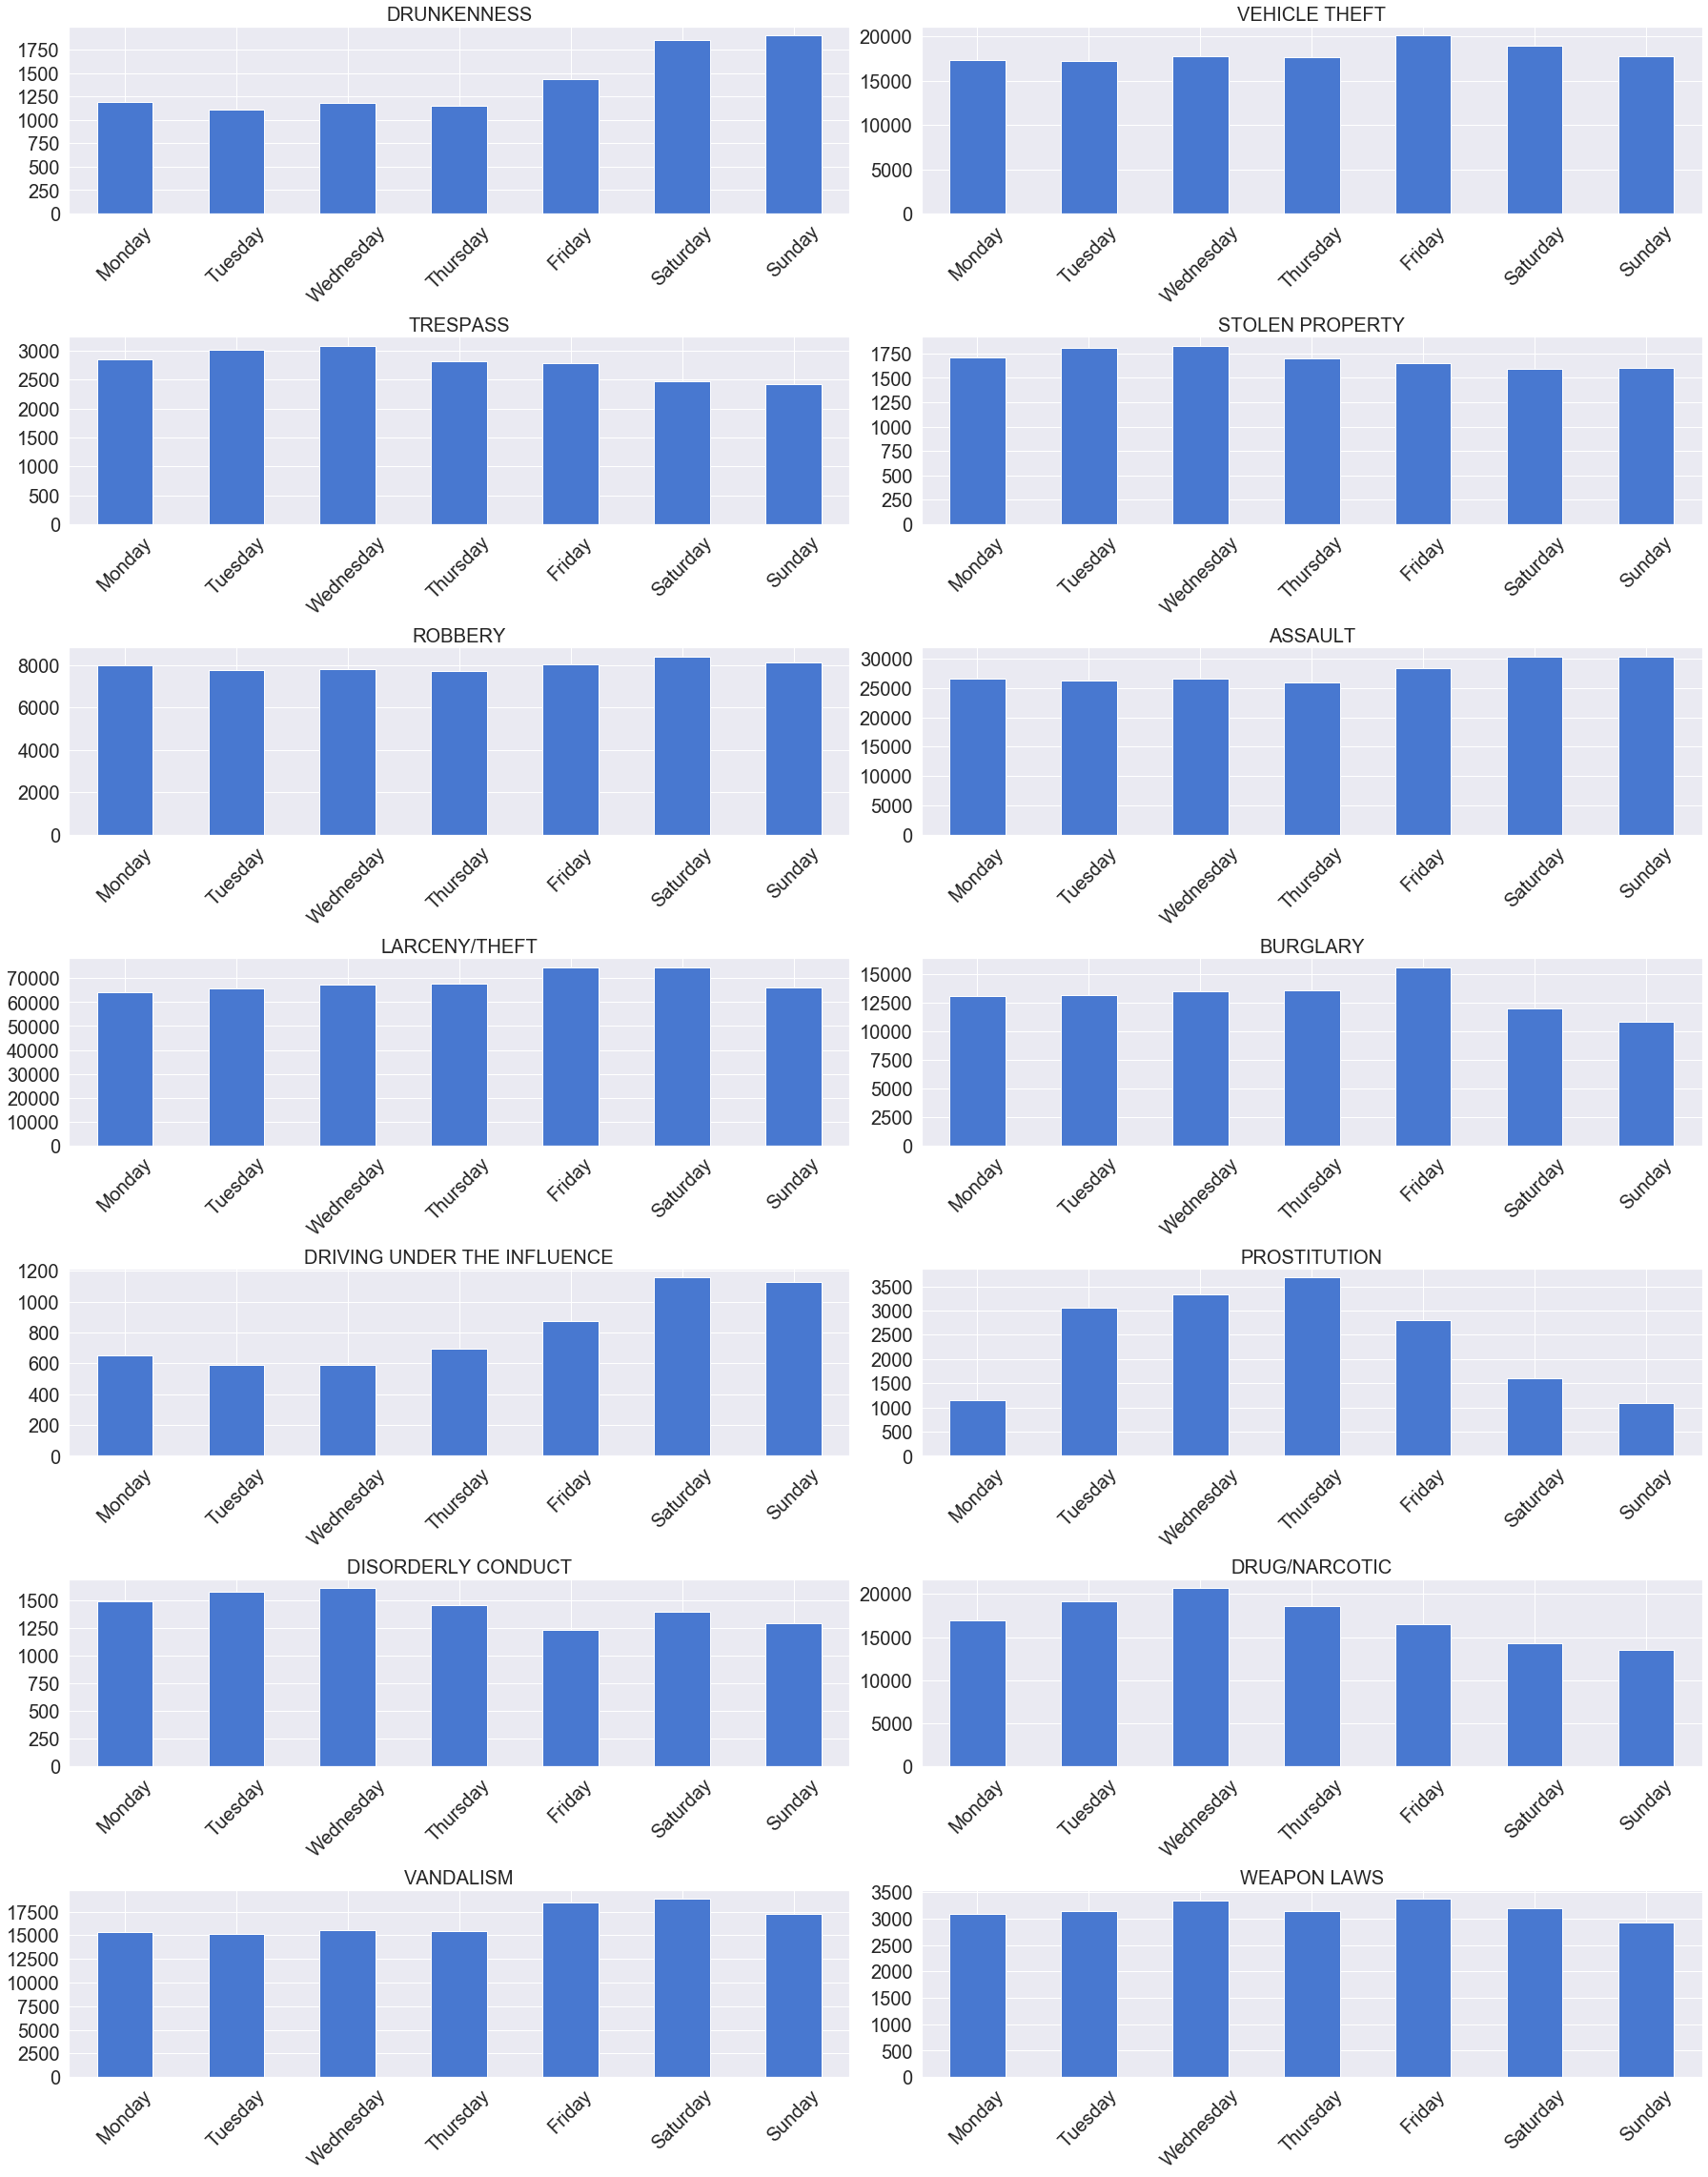

In [6]:
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] #Index

plt.figure(figsize=(25,35))
for i, elem in enumerate(focuscrimes):
    plt.subplot(8,2,i+1)
    df_week = df[df['Category'] == elem]  #Loop over focuscrimes. 
    df_week.groupby(['DayOfWeek']).size().reindex(Weekday).plot(kind='bar') #Counting size of elem and reindexing to ensure the order monday to sunday.
    plt.title(elem, fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20, rotation = 45)
    plt.xlabel('')
plt.tight_layout()
plt.show()

#### Monthly changes

Same concept as before but now we groupby date. The axis go from January = 1 to December = 12.
An interesting observation is to see that drug/narcotic crimes are significatnly higher in the beginning of the year.

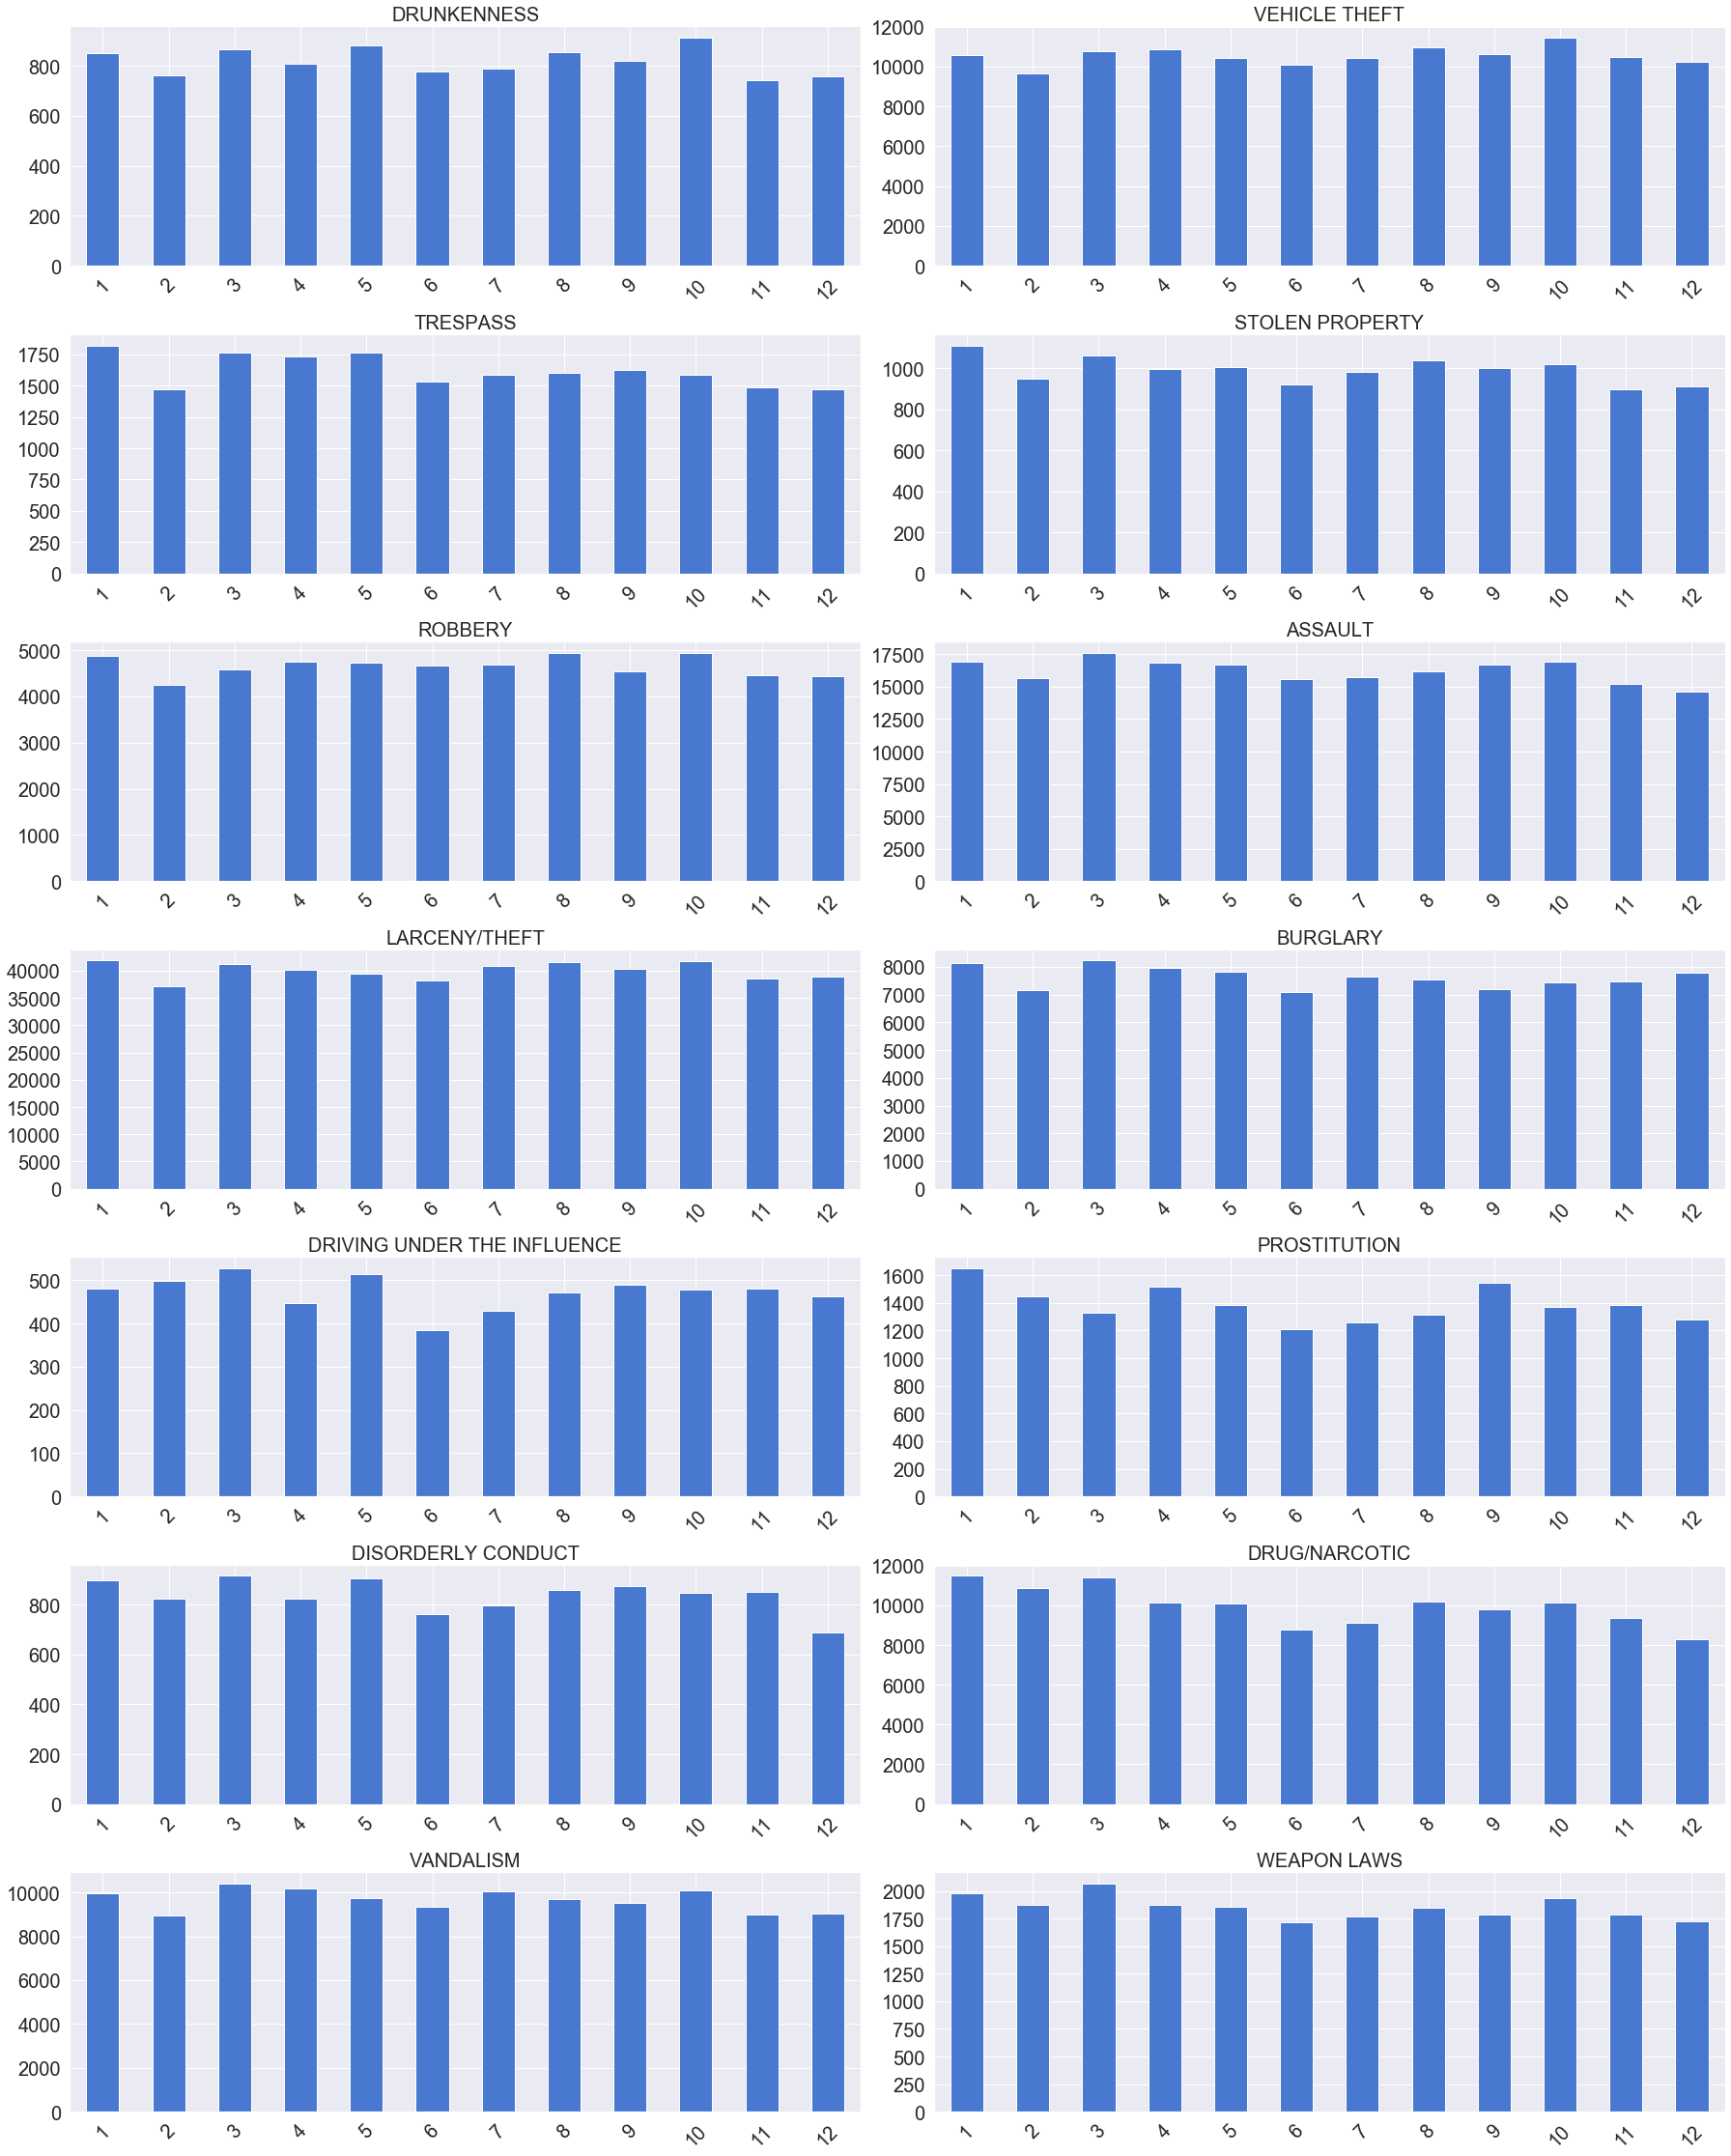

In [7]:
plt.figure(figsize=(25,35))
for i, elem in enumerate(focuscrimes):
    plt.subplot(8,2,i+1)
    df_month = df[df['Category'] == elem] #Loop over focuscrimes.
    df_month.groupby(df['Date'].dt.month).size().plot(kind='bar') #Counting the size of elem in every month.
    plt.title(elem, fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20, rotation = 45)
    plt.xlabel('')
plt.tight_layout()
plt.show()

All the focus crimes are now grouped in order to see the total amount of focus crimes every month. It can be seen that december has the lowest amount of registered crimes. It could seem the christmas spirit is effecting people or maybe the productivity of the police. 

In [ ]:
df_focus = df[df['Category'].isin(focuscrimes)]
df_focus.groupby(df['Date'].dt.month).size().plot(kind='bar')
plt.title(Total amount of crimes every month, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 45)
plt.xlabel('')
plt.tight_layout()
plt.show()

#### Hourly Change


Same plot, but now grouping by hour of the day. Here a lot of expected tendency can be observed, such as drunkenness is highest in the evening/night similar to driving under influence. 



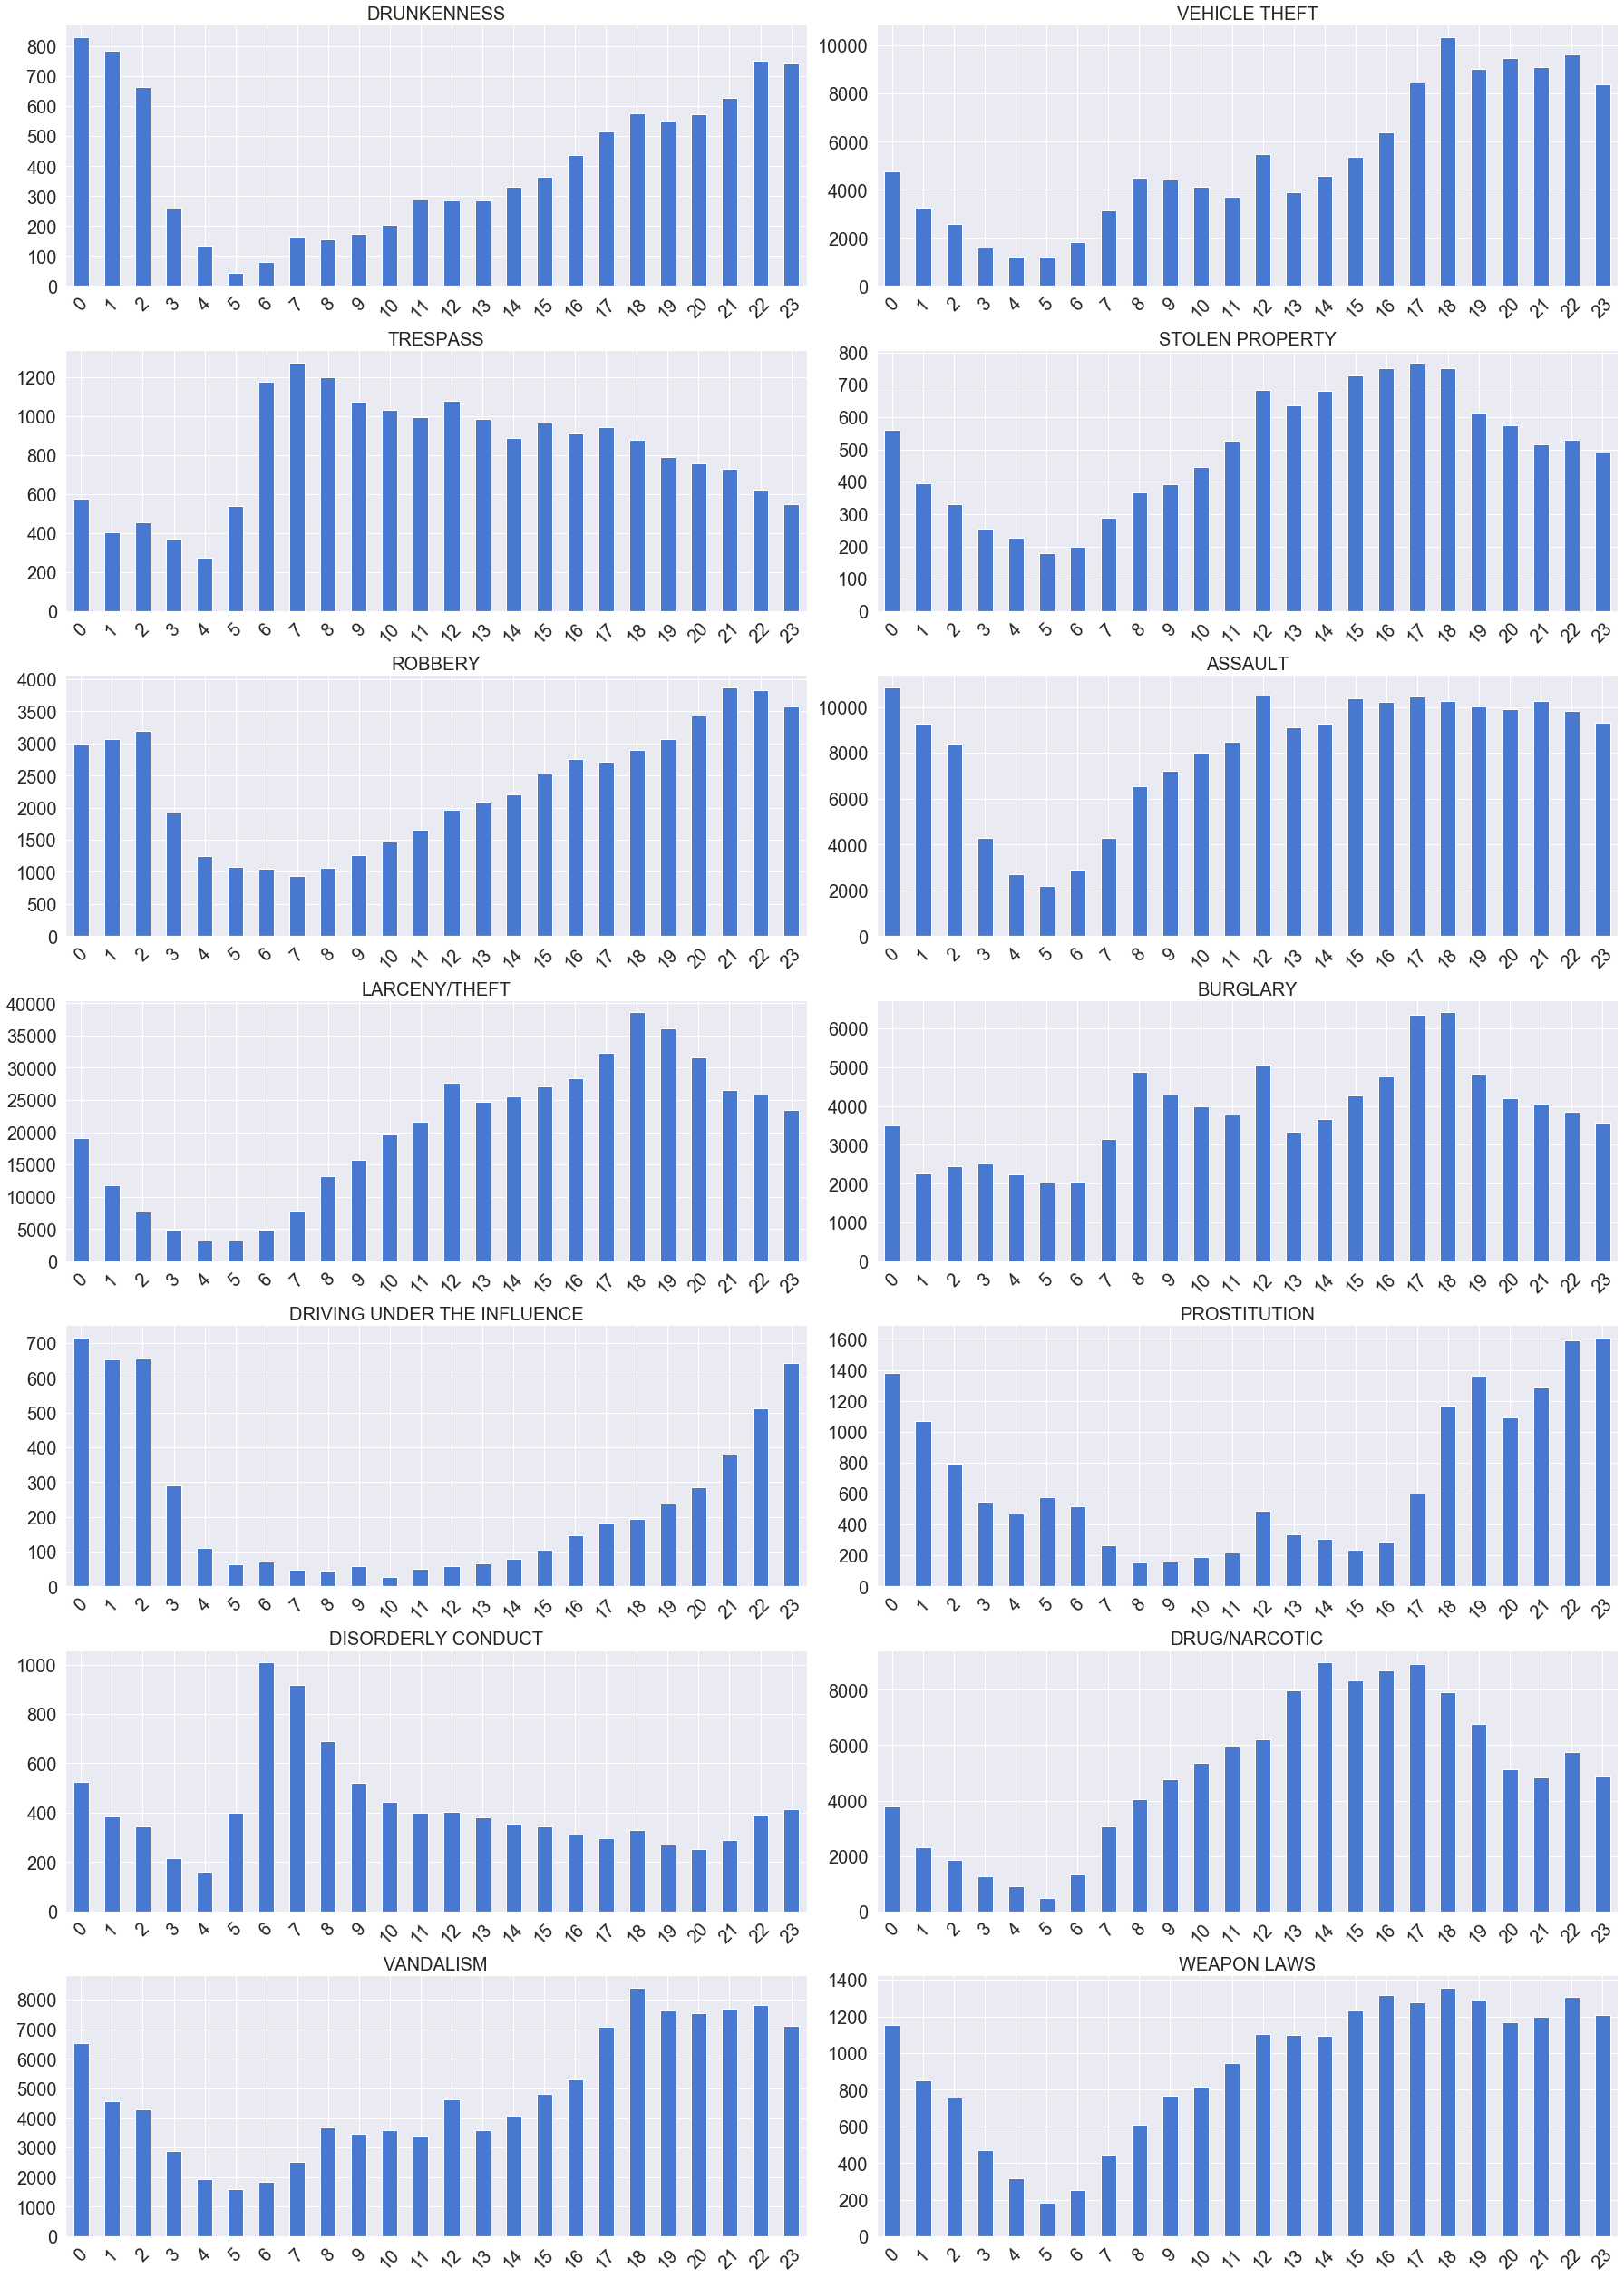

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

plt.figure(figsize=(25,35))
for i, elem in enumerate(focuscrimes):
    plt.subplot(7,2,i+1)
    df_hour = df[df['Category'] == elem] #Loop over focuscrimes.
    df_hour.groupby(df['Time'].dt.hour).size().plot(kind='bar') #Counting the size of elem in every hour of the day
    plt.title(elem, fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20, rotation = 45)
    plt.xlabel('')
plt.tight_layout()
plt.show()

#### 168 hours span

First we sort by weekday and then we group by hour. 


In [9]:
# Code to sort the weekdays in order. 
from pandas.api.types import CategoricalDtype

DayOfWeek = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
df['DayOfWeek'] =df['DayOfWeek'].astype(CategoricalDtype(categories=DayOfWeek)) #Reindexing

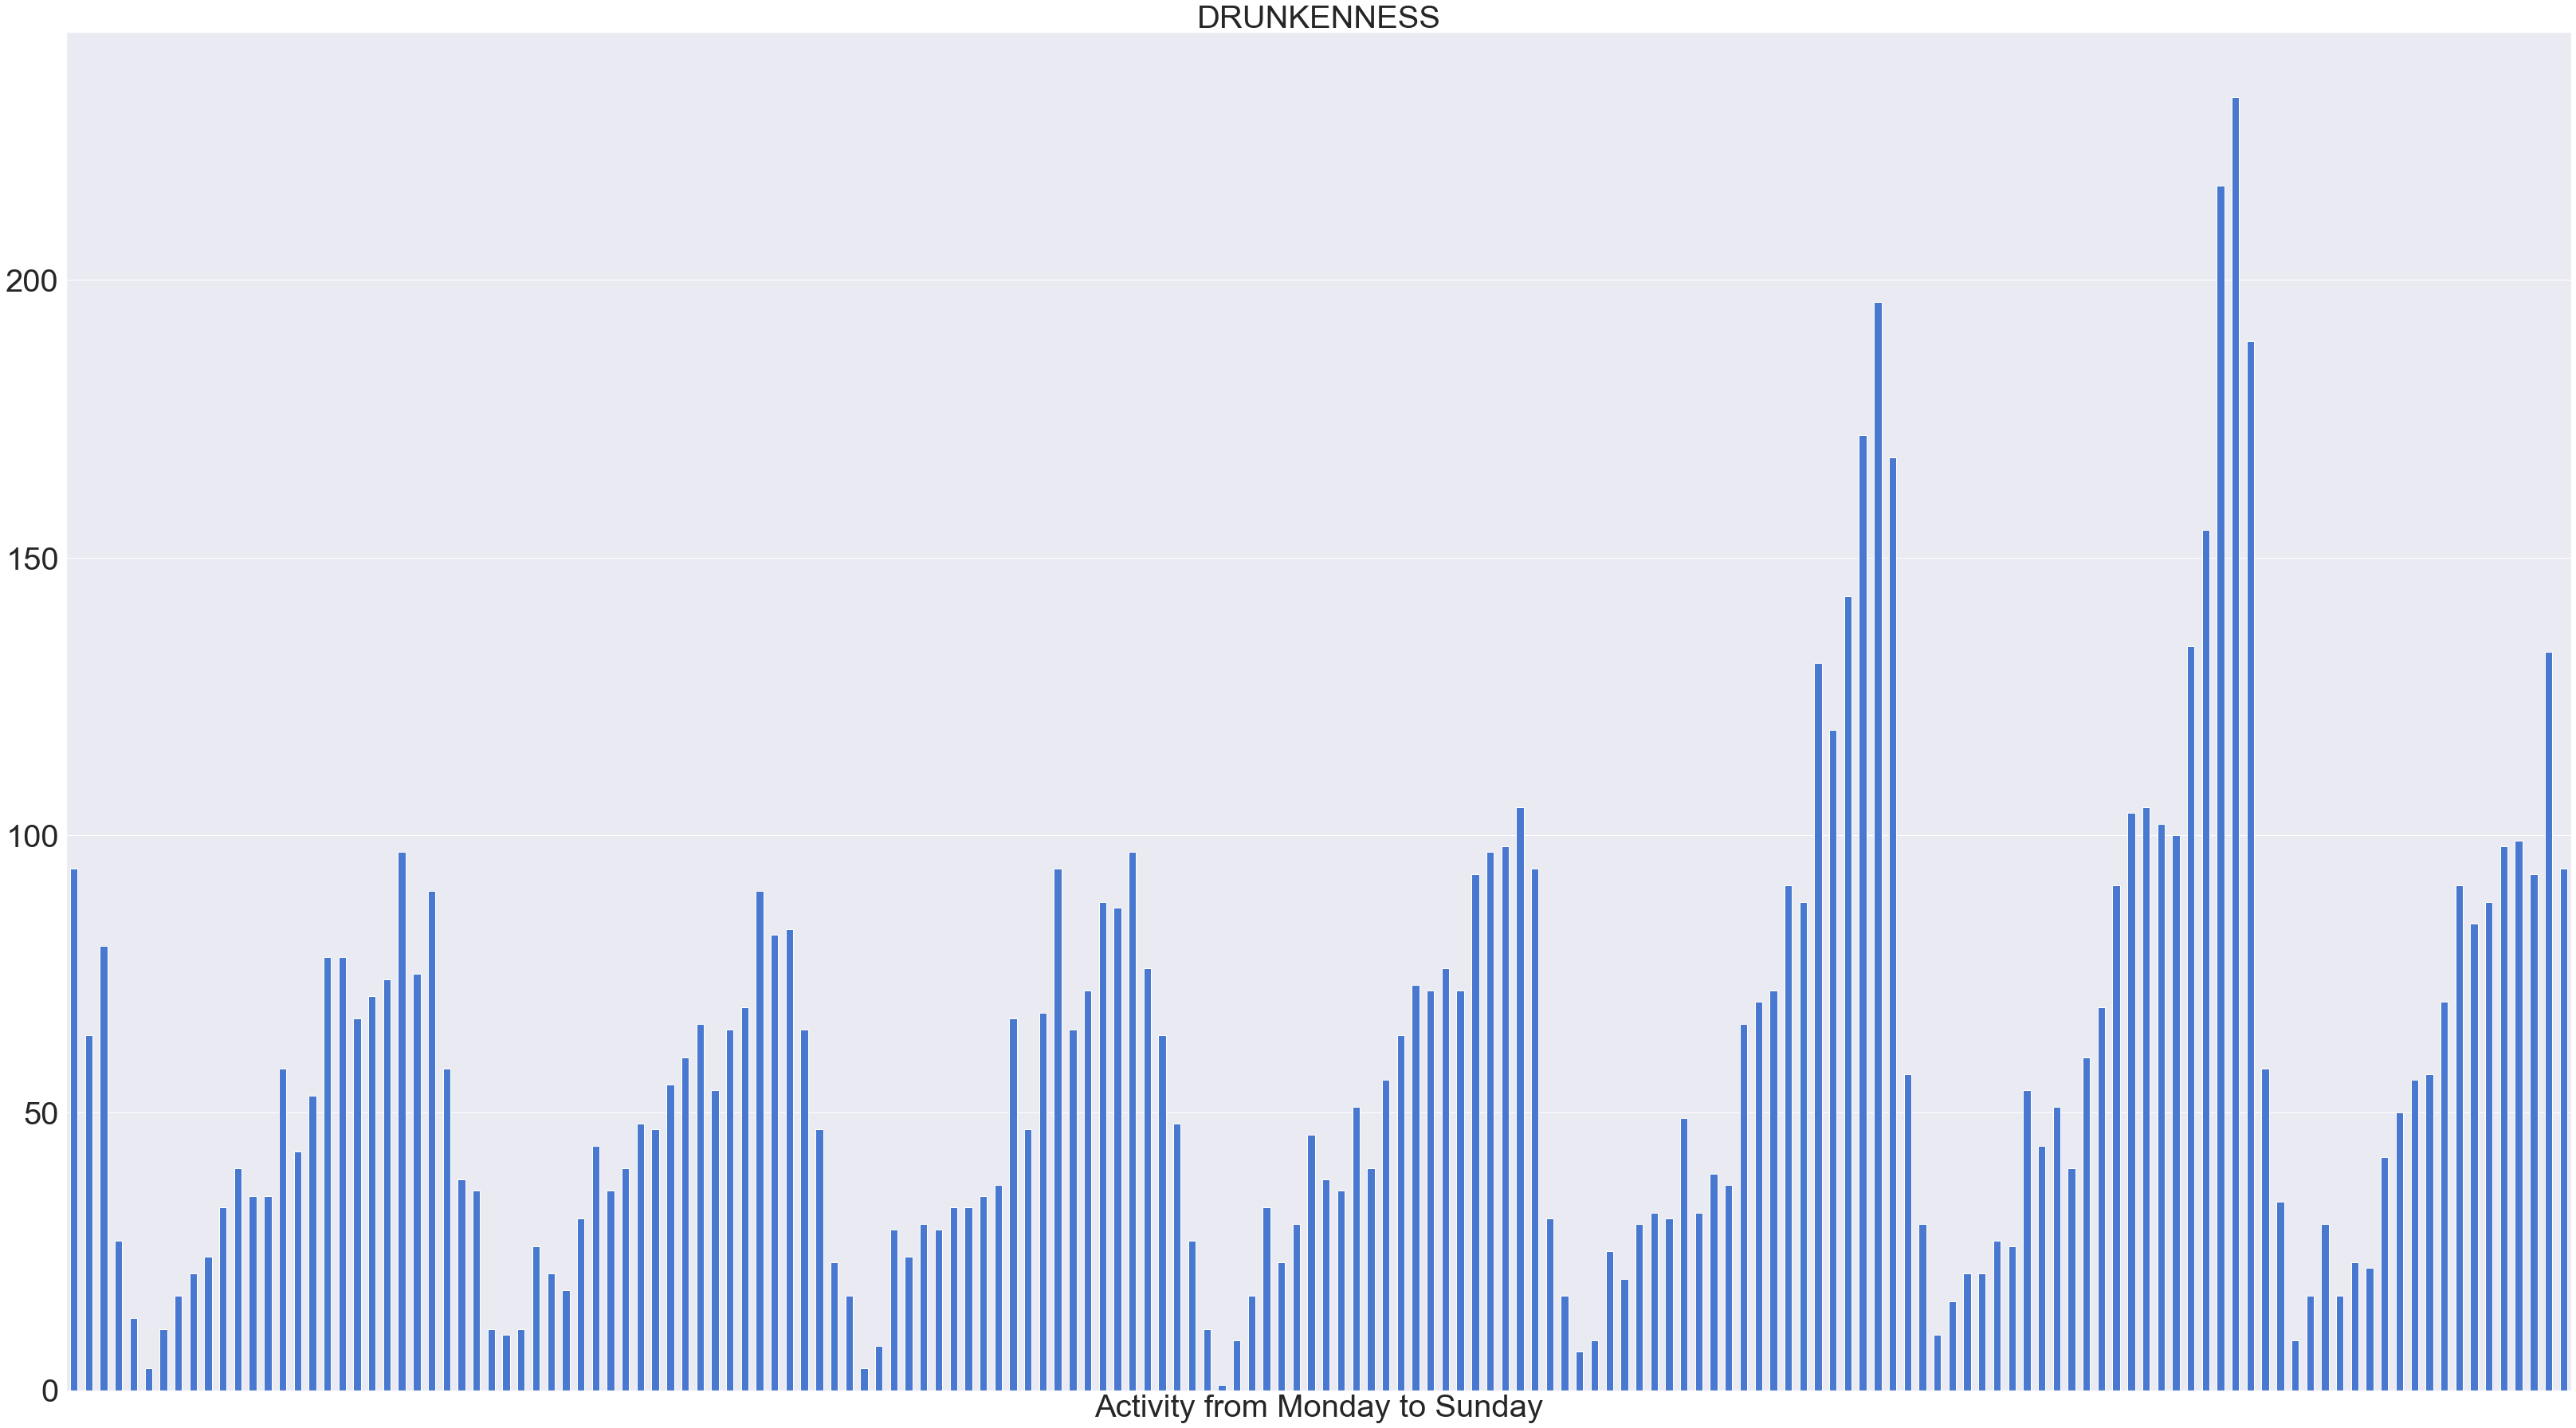

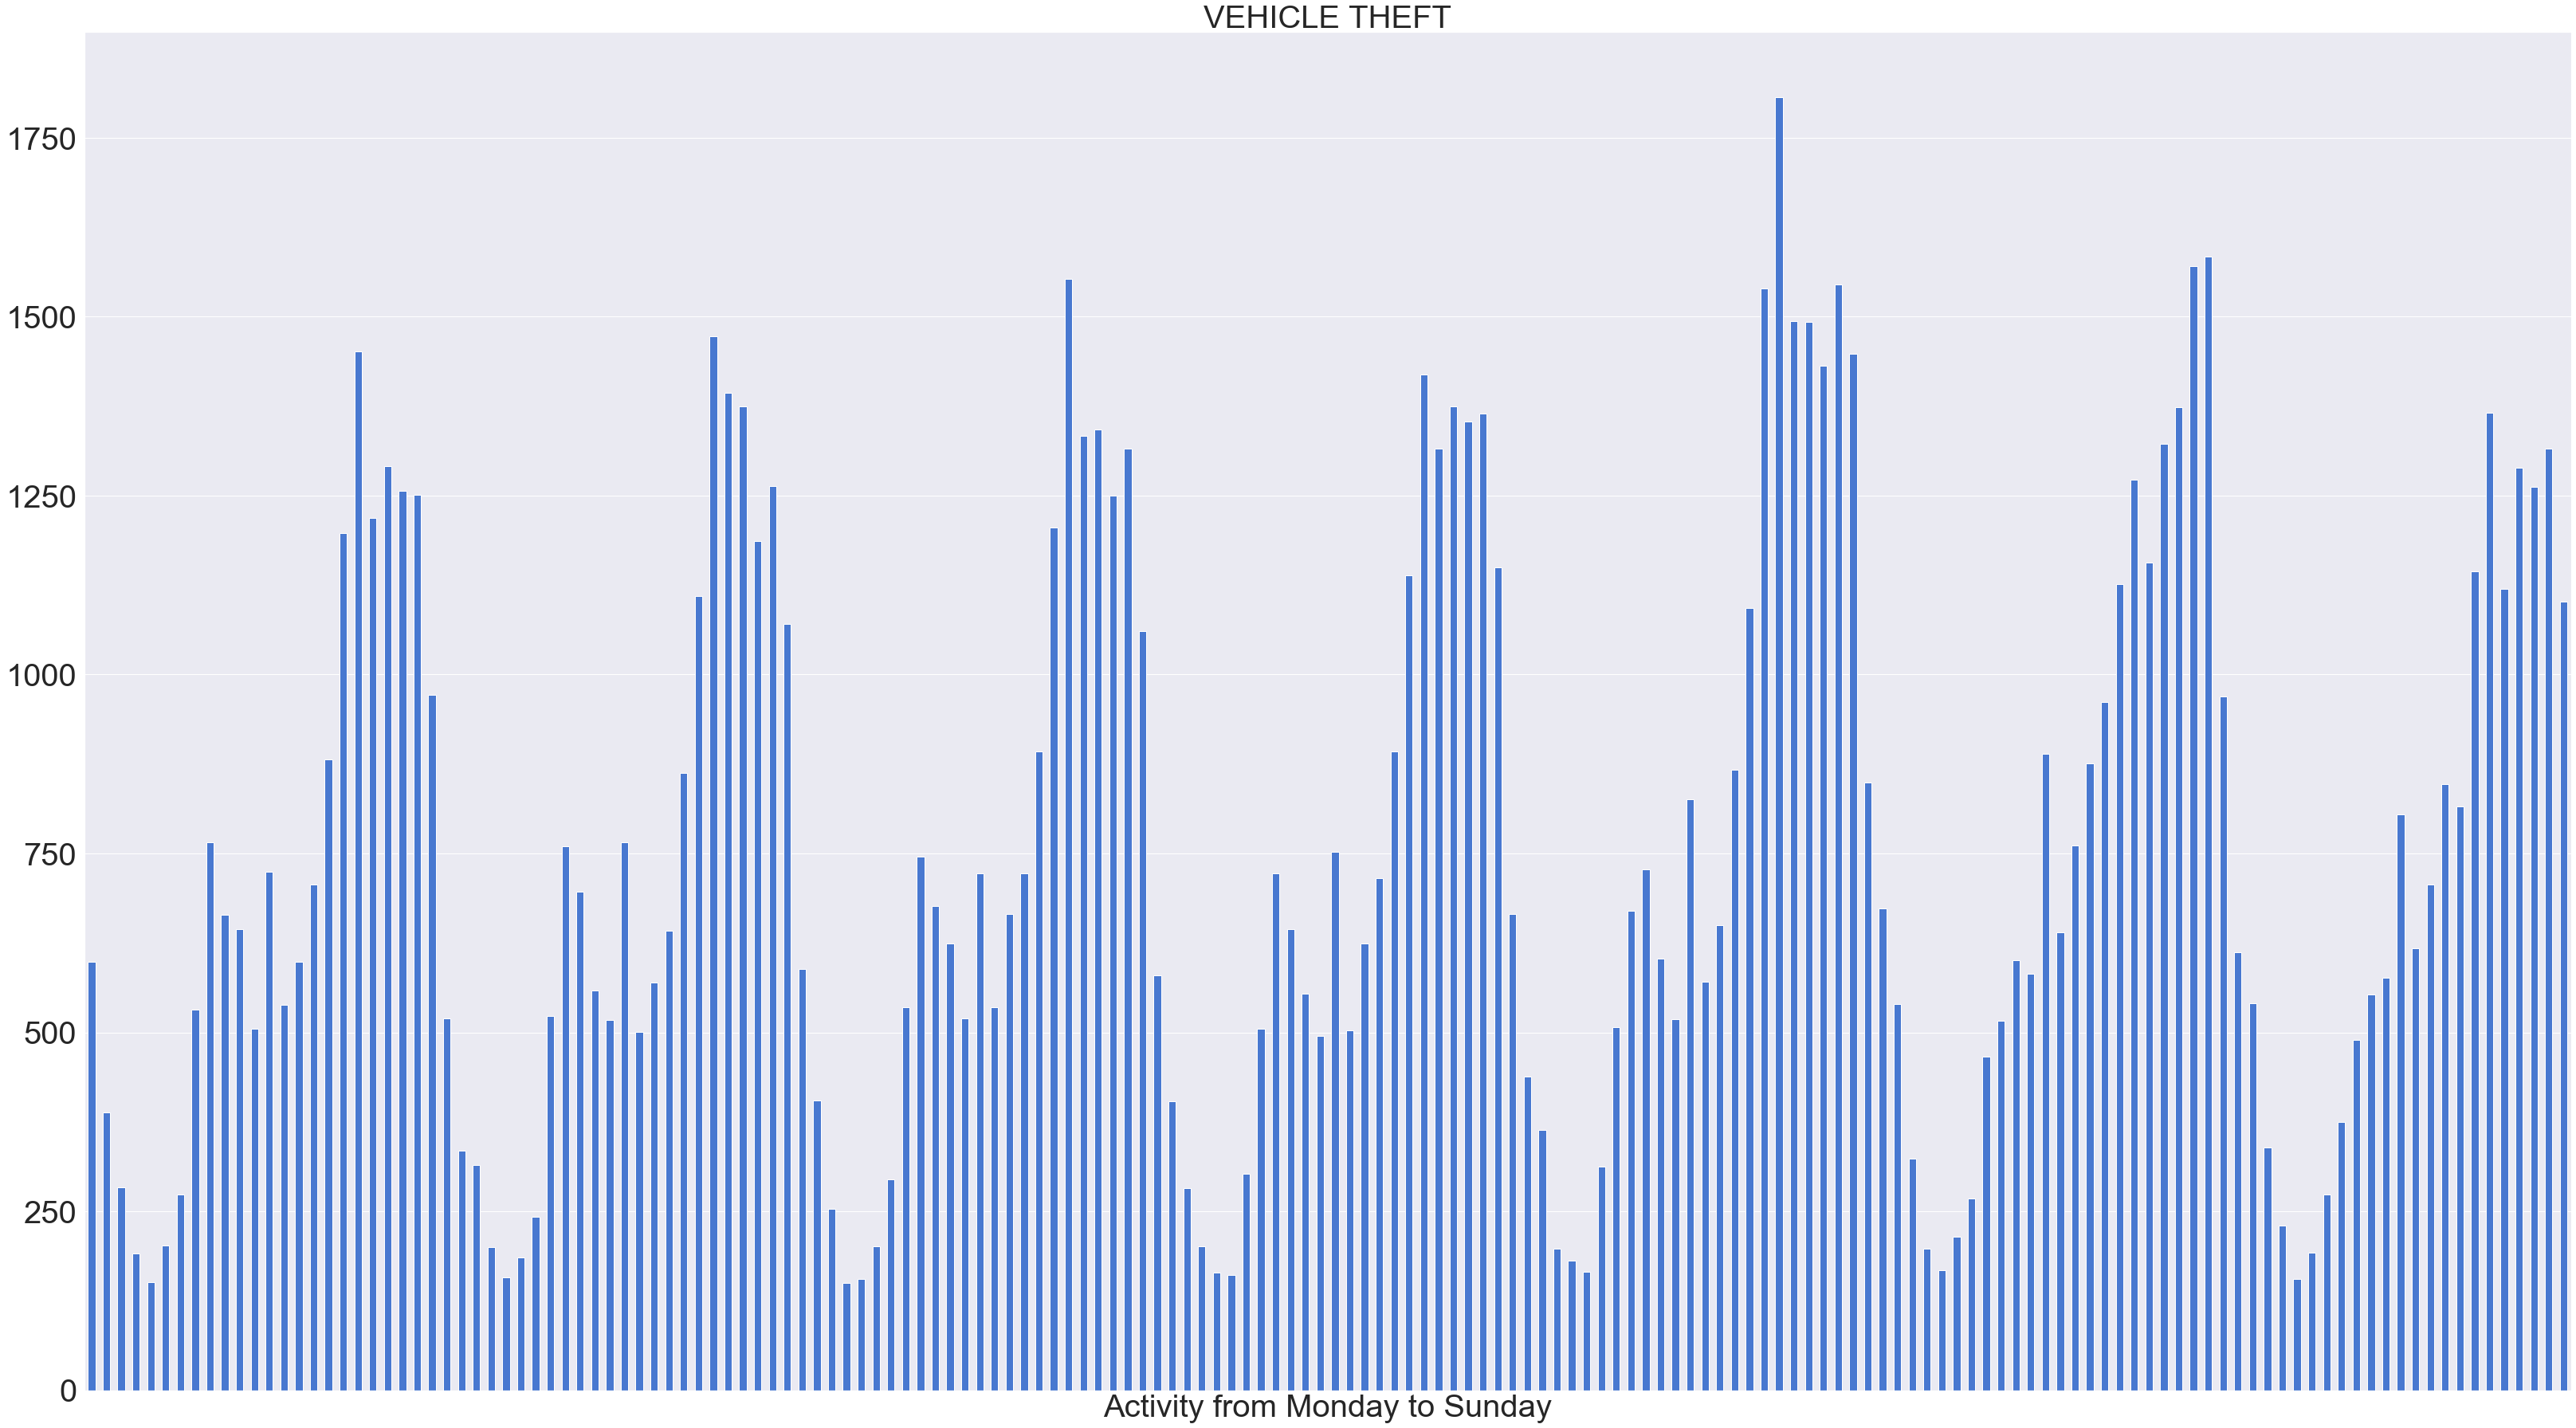

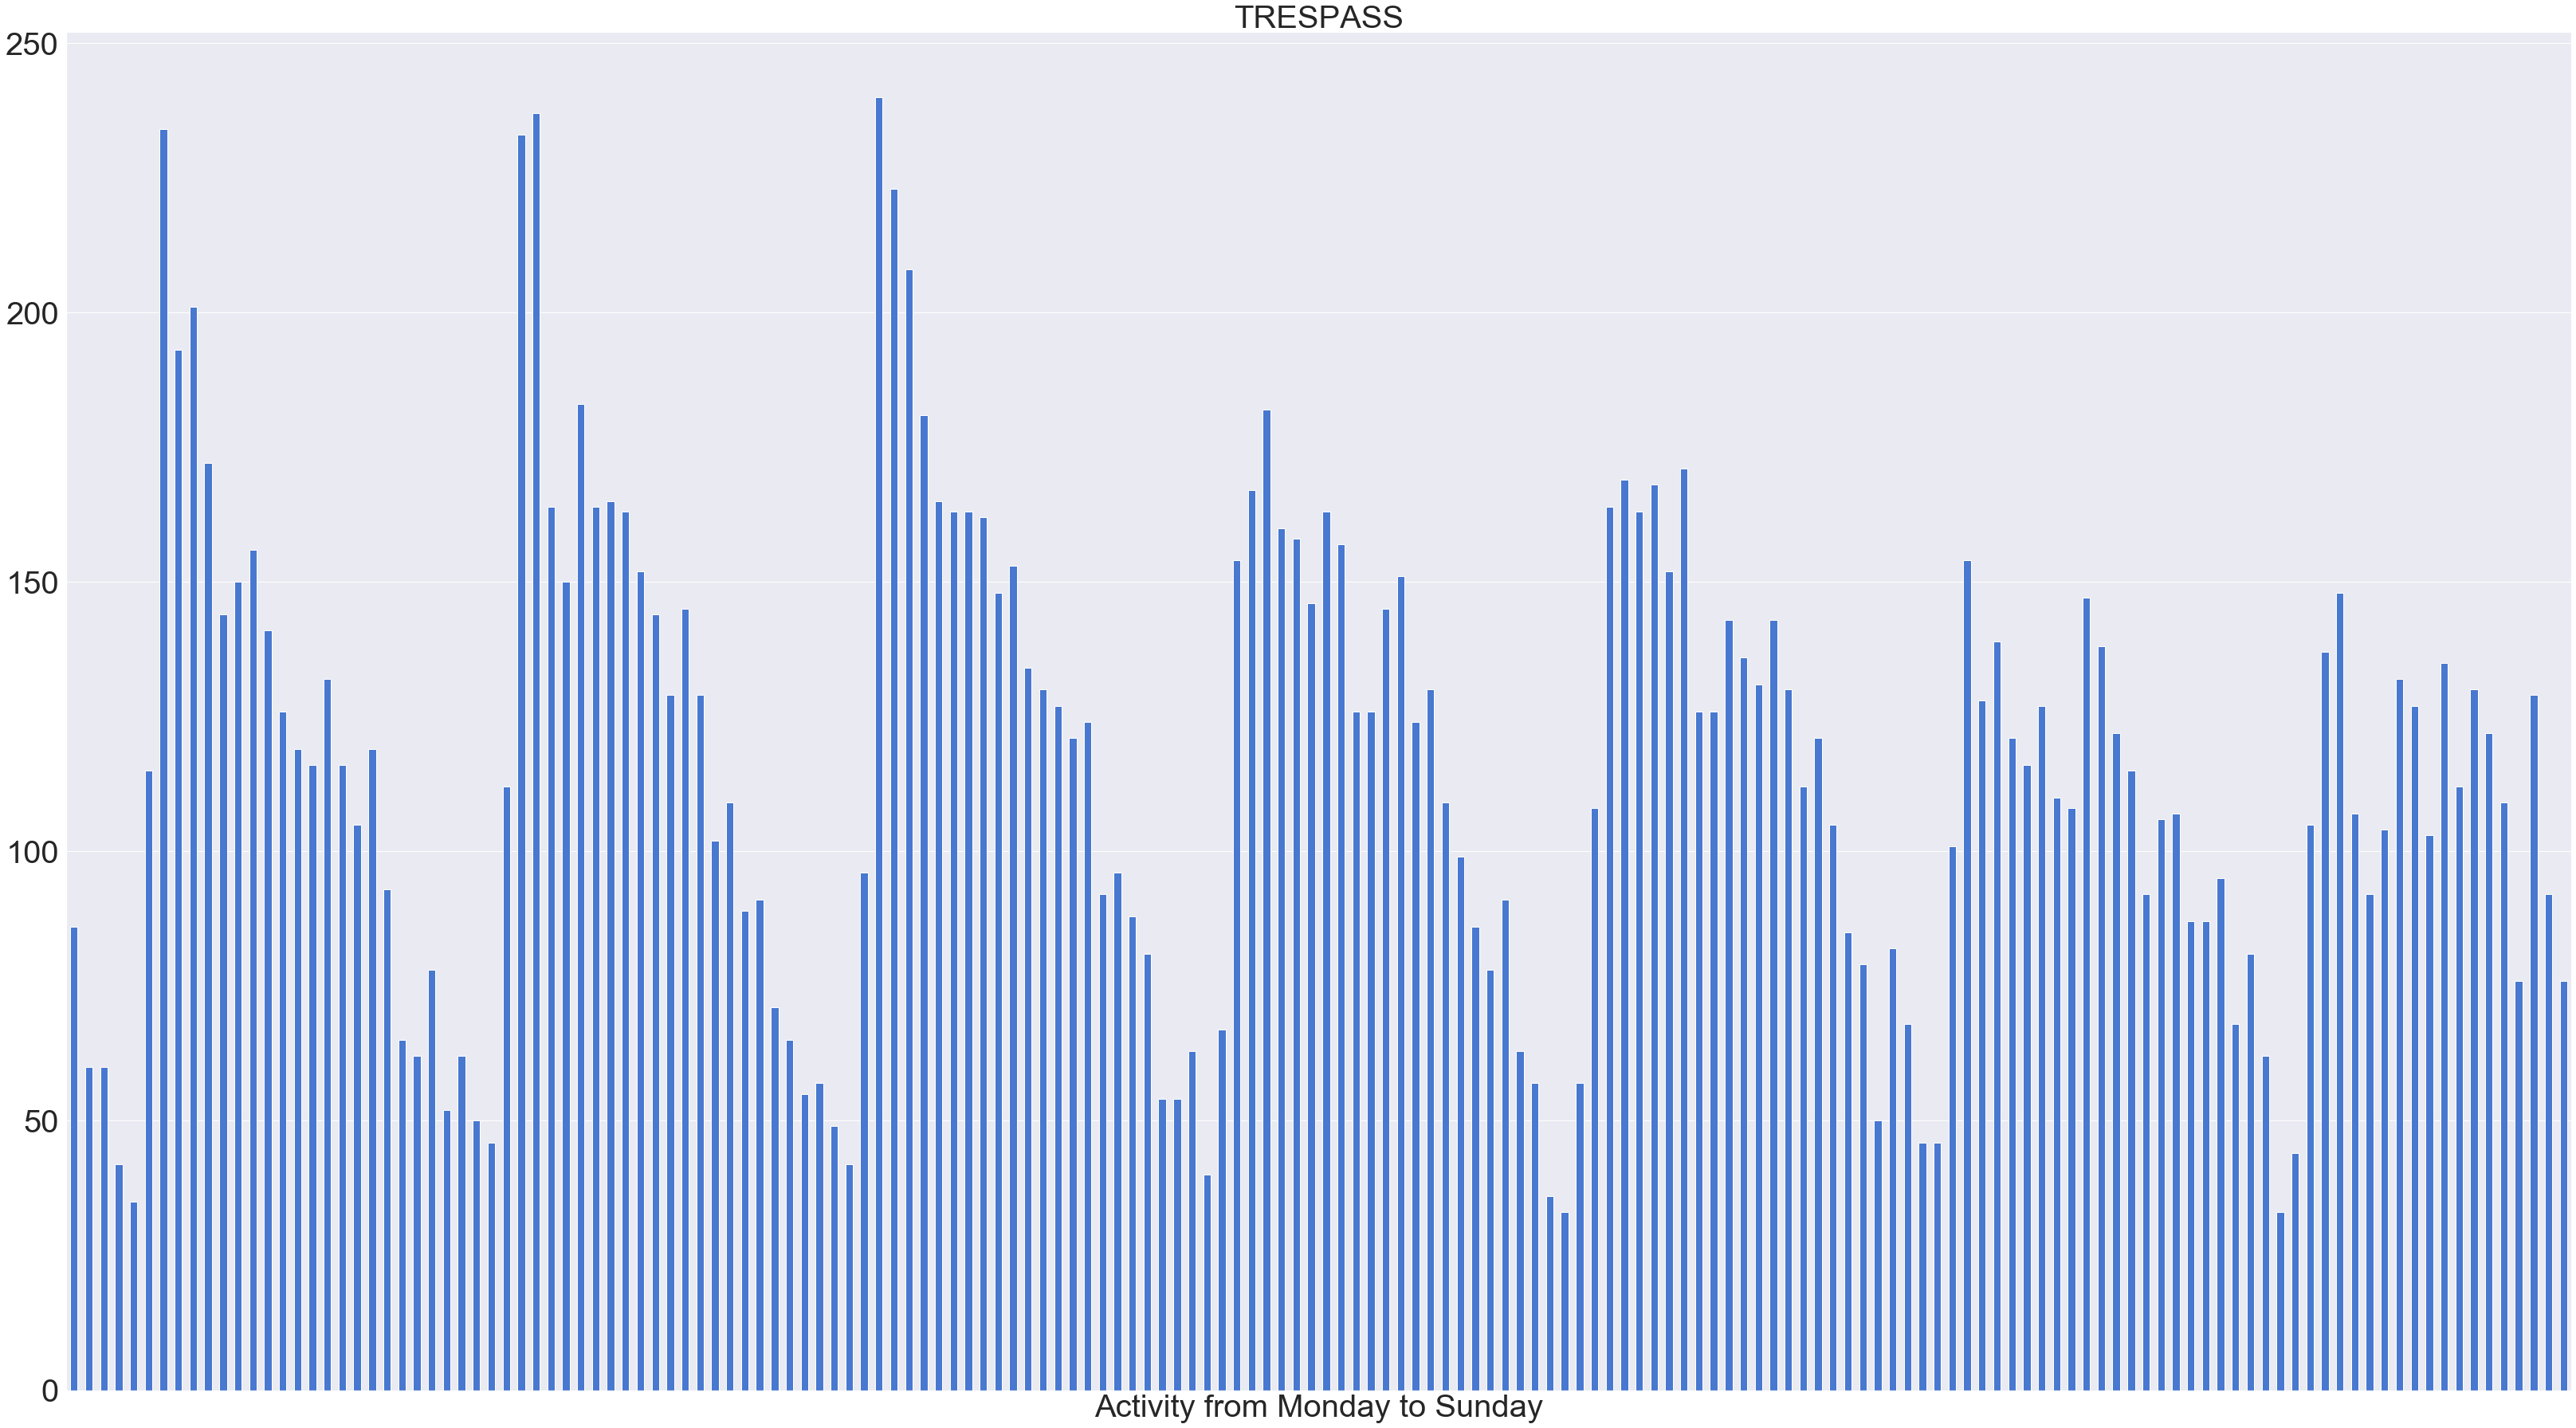

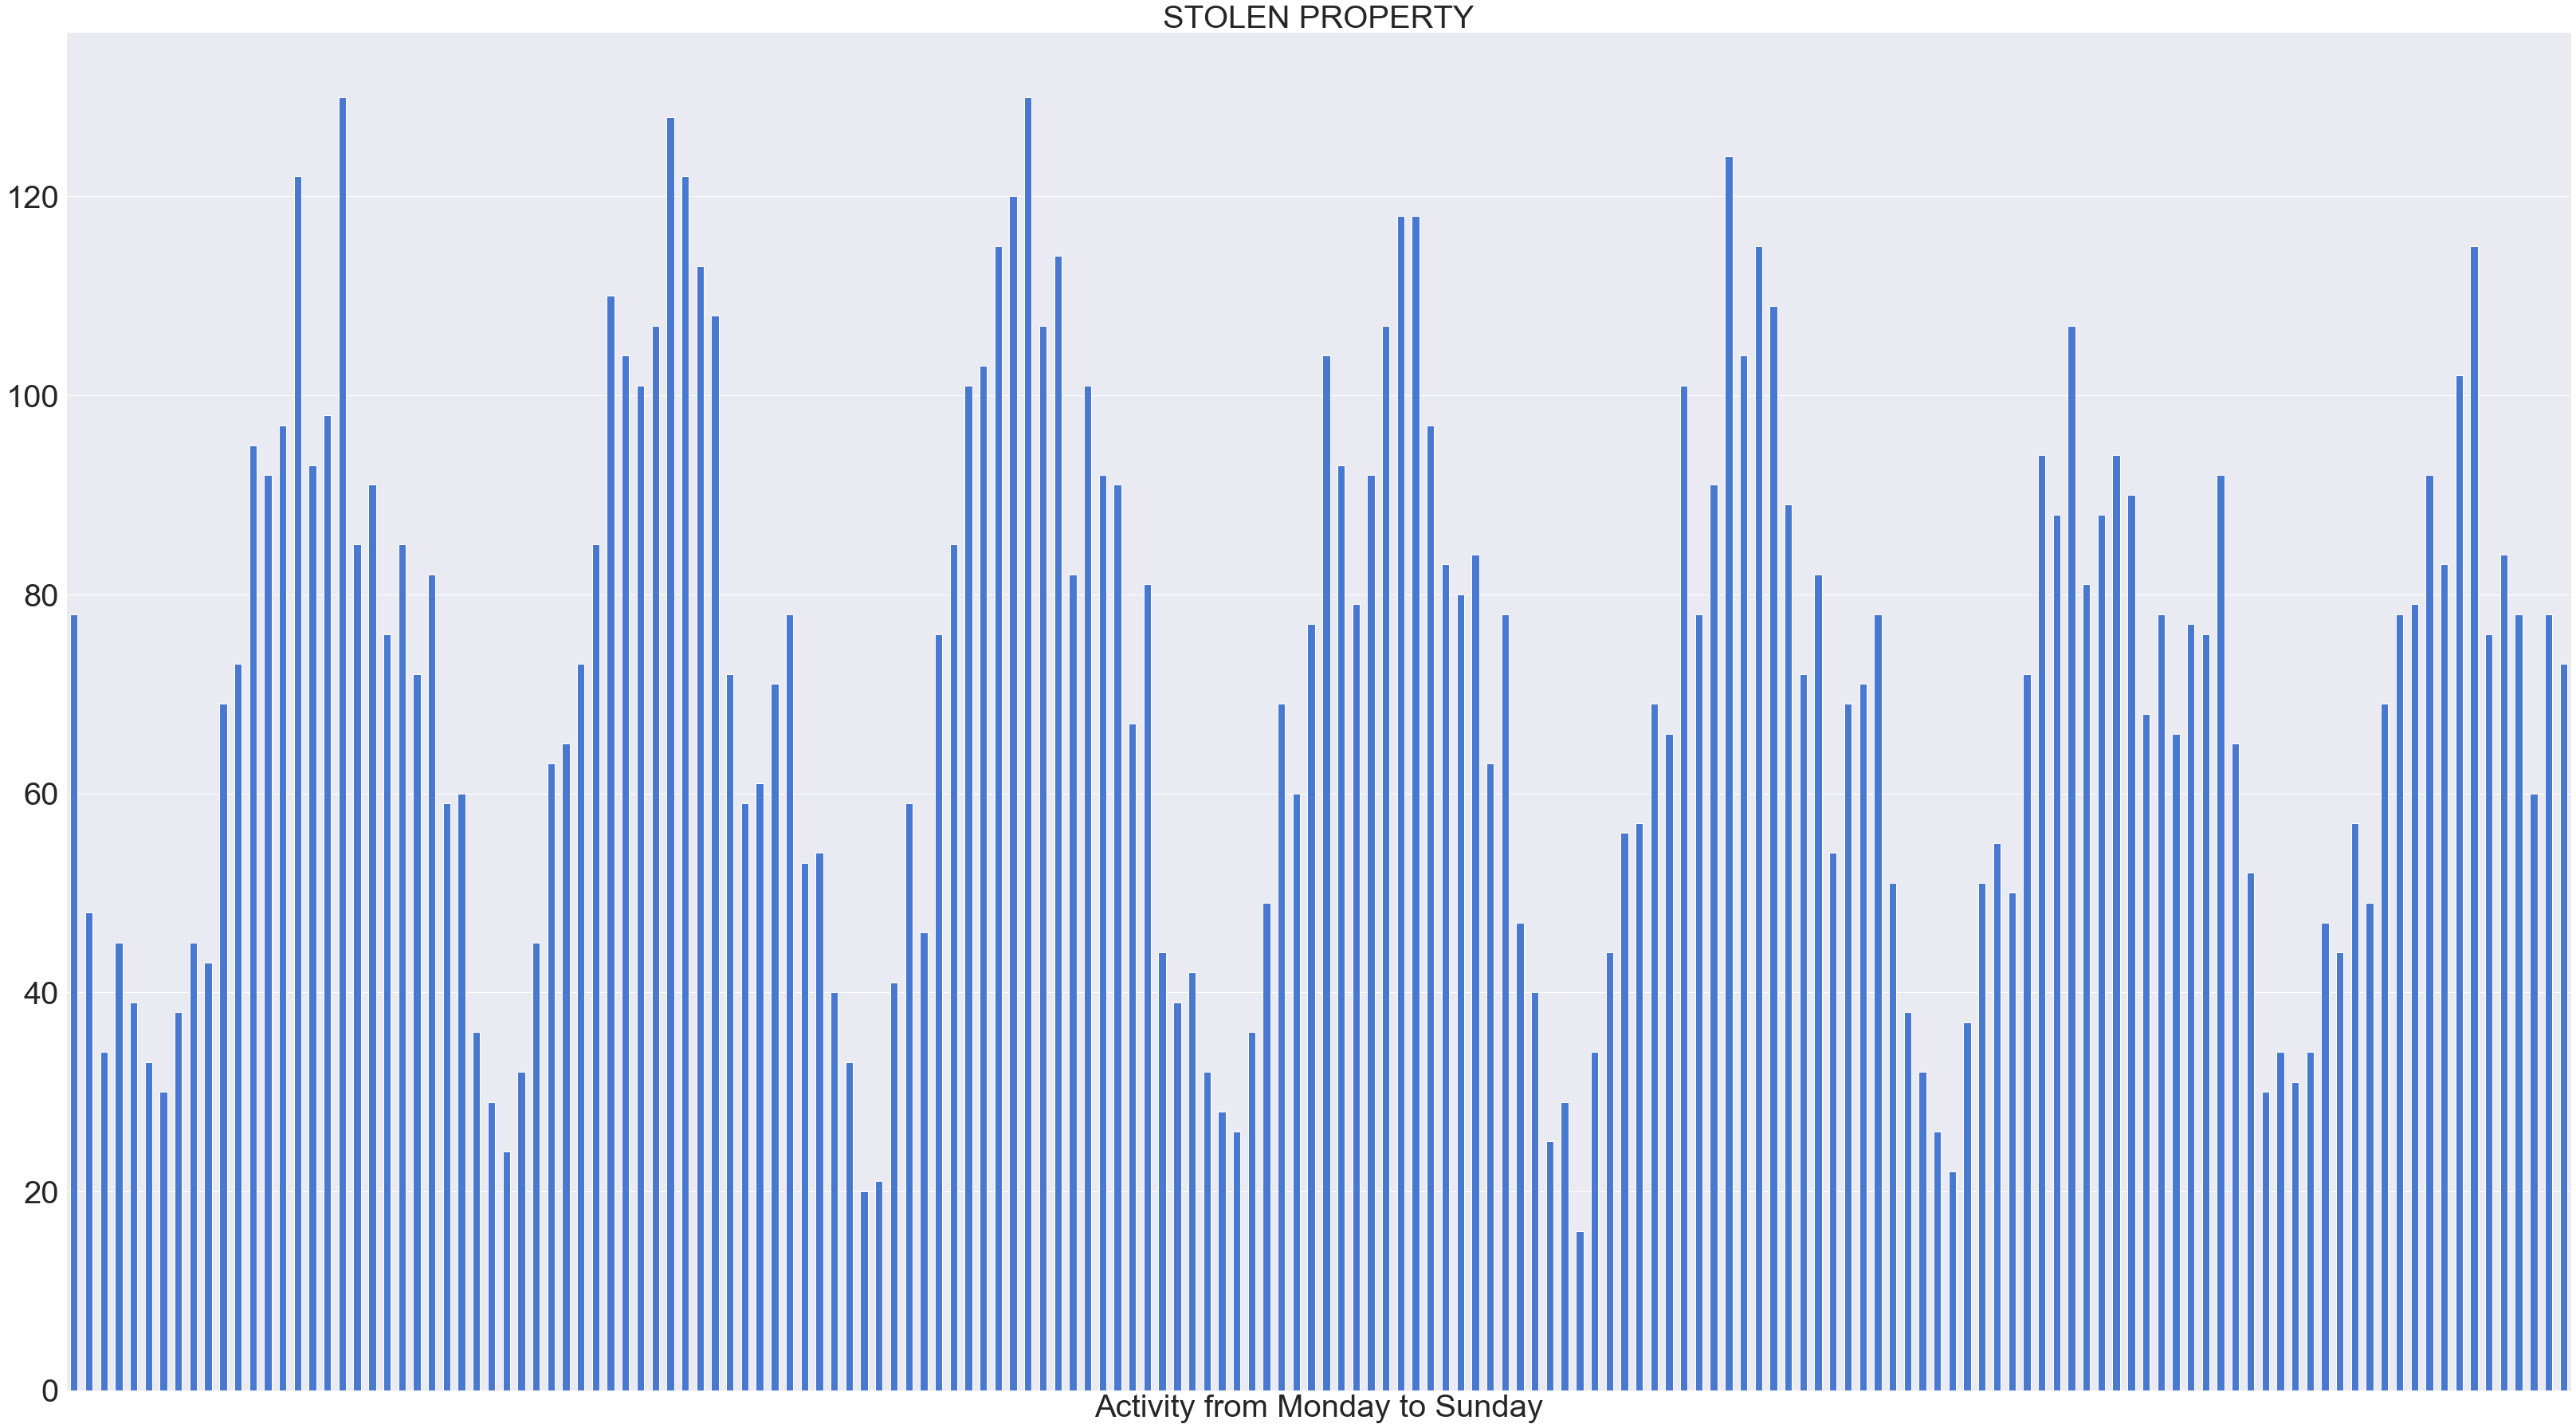

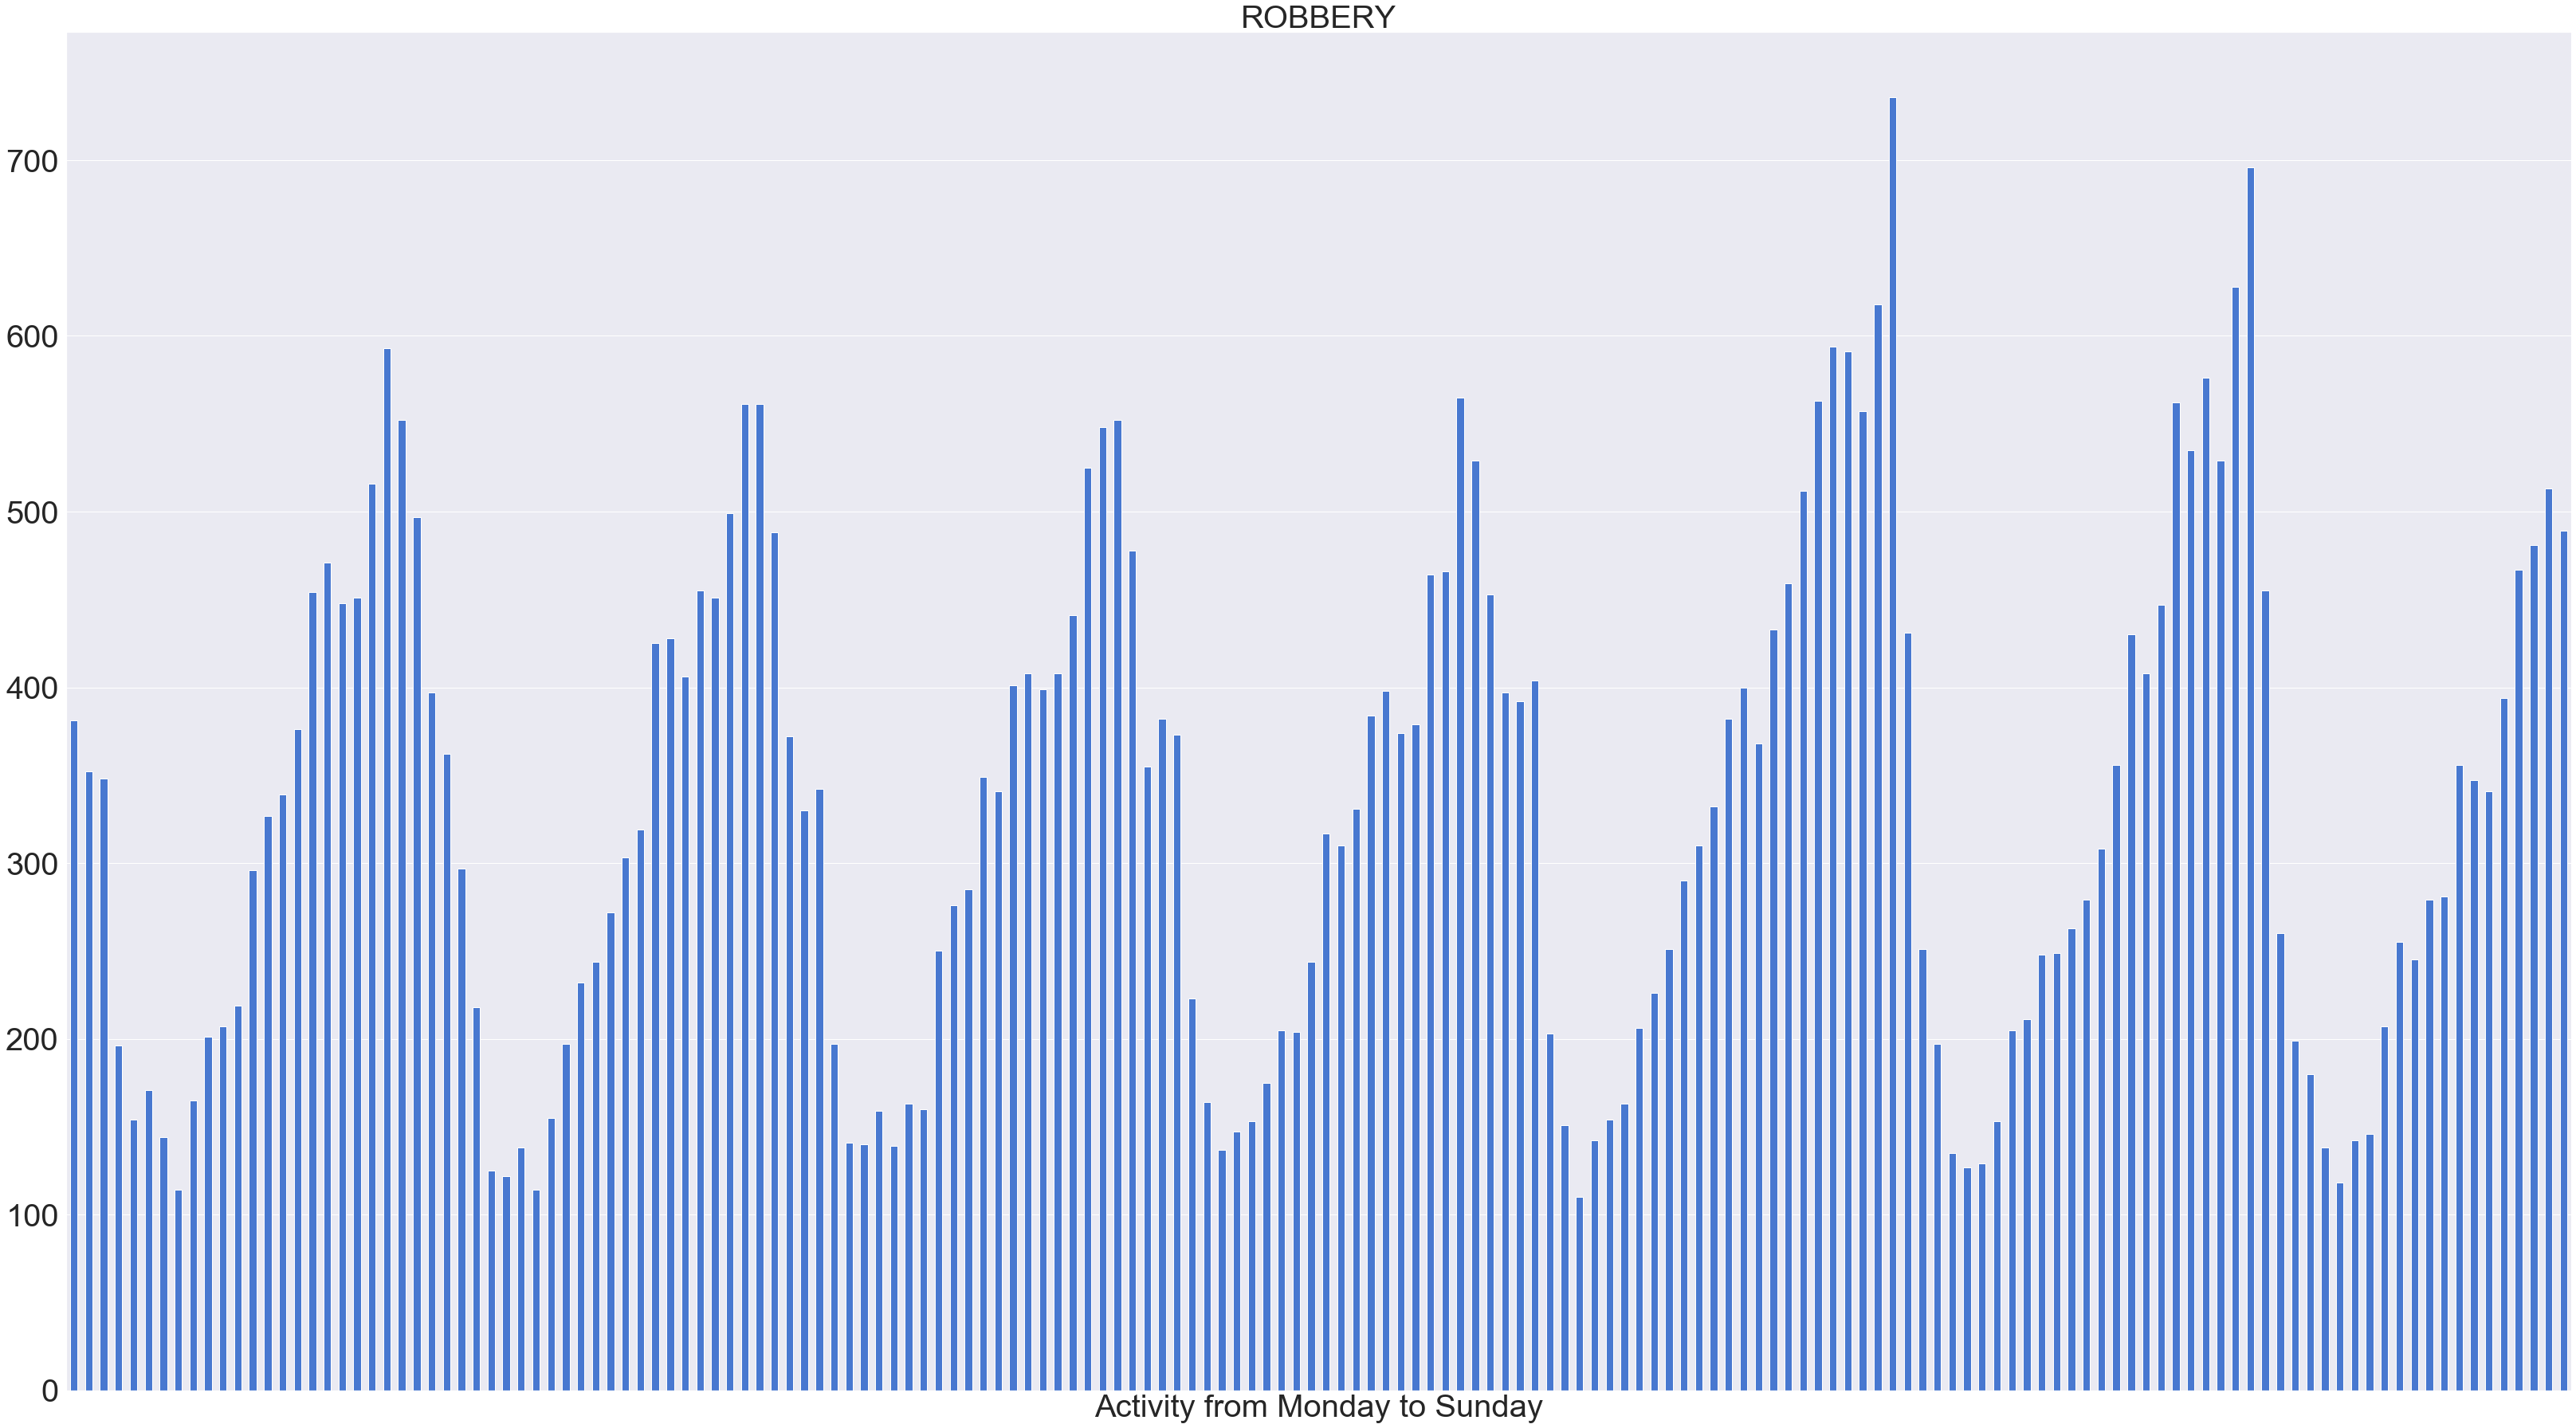

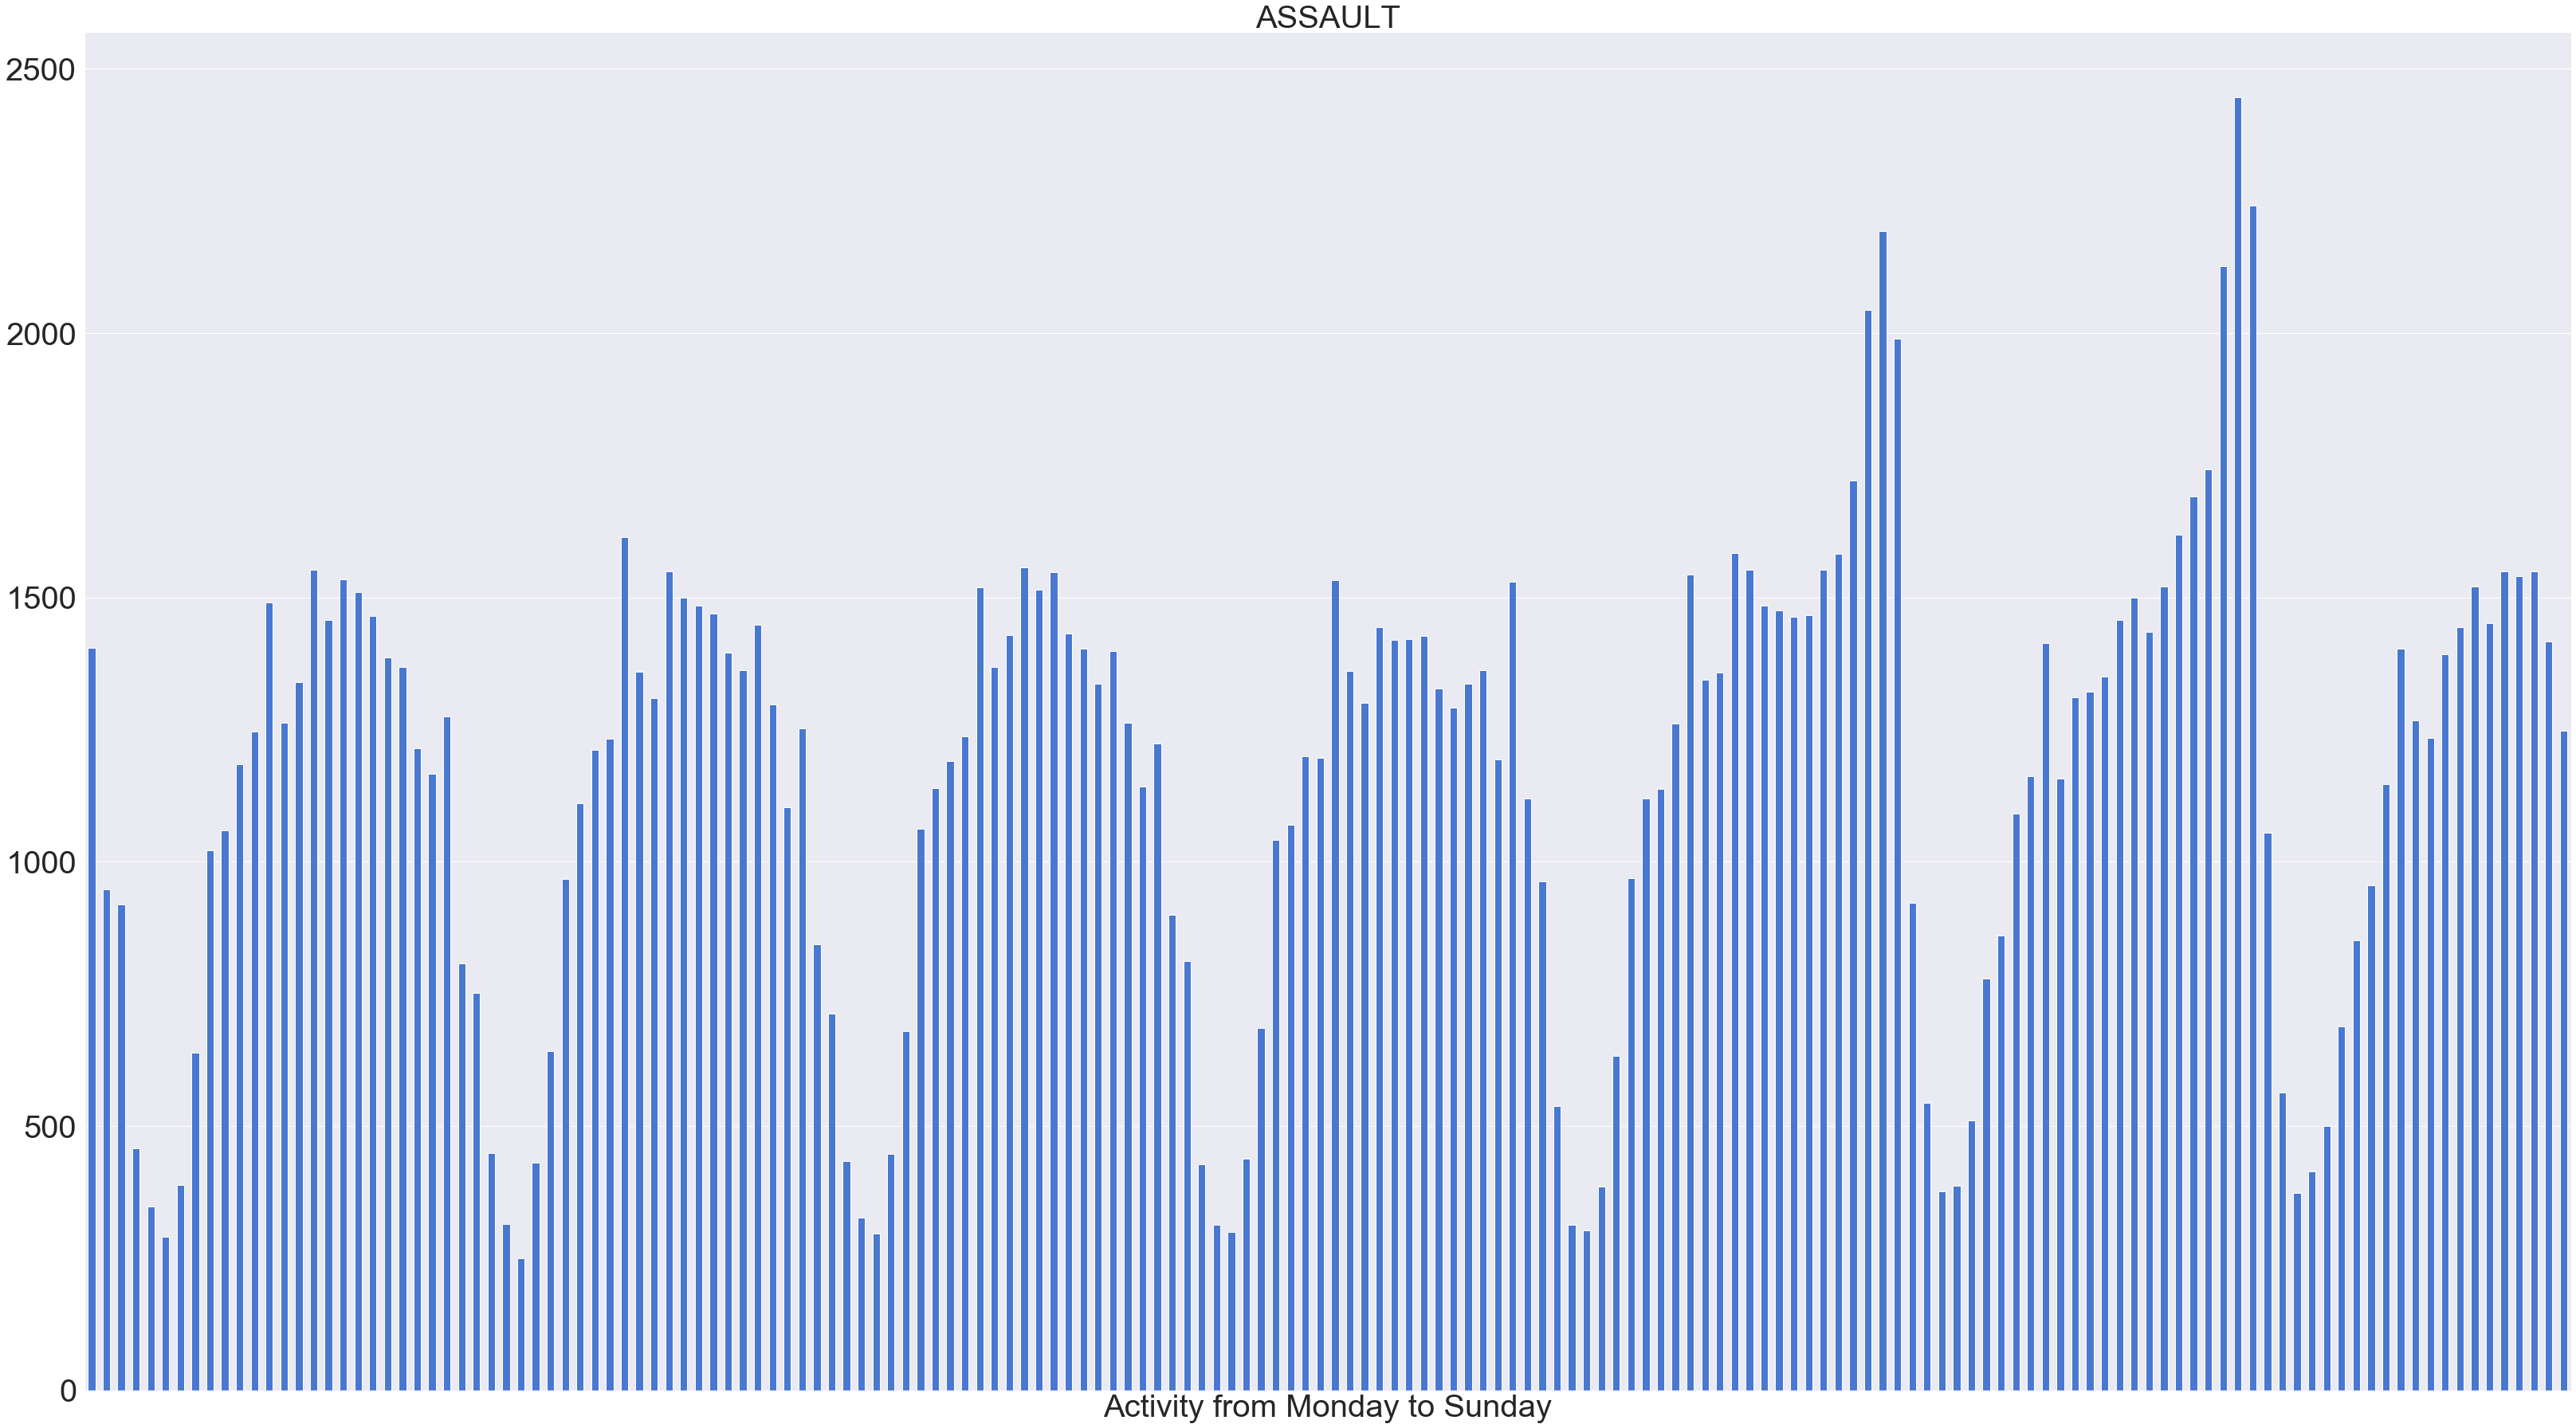

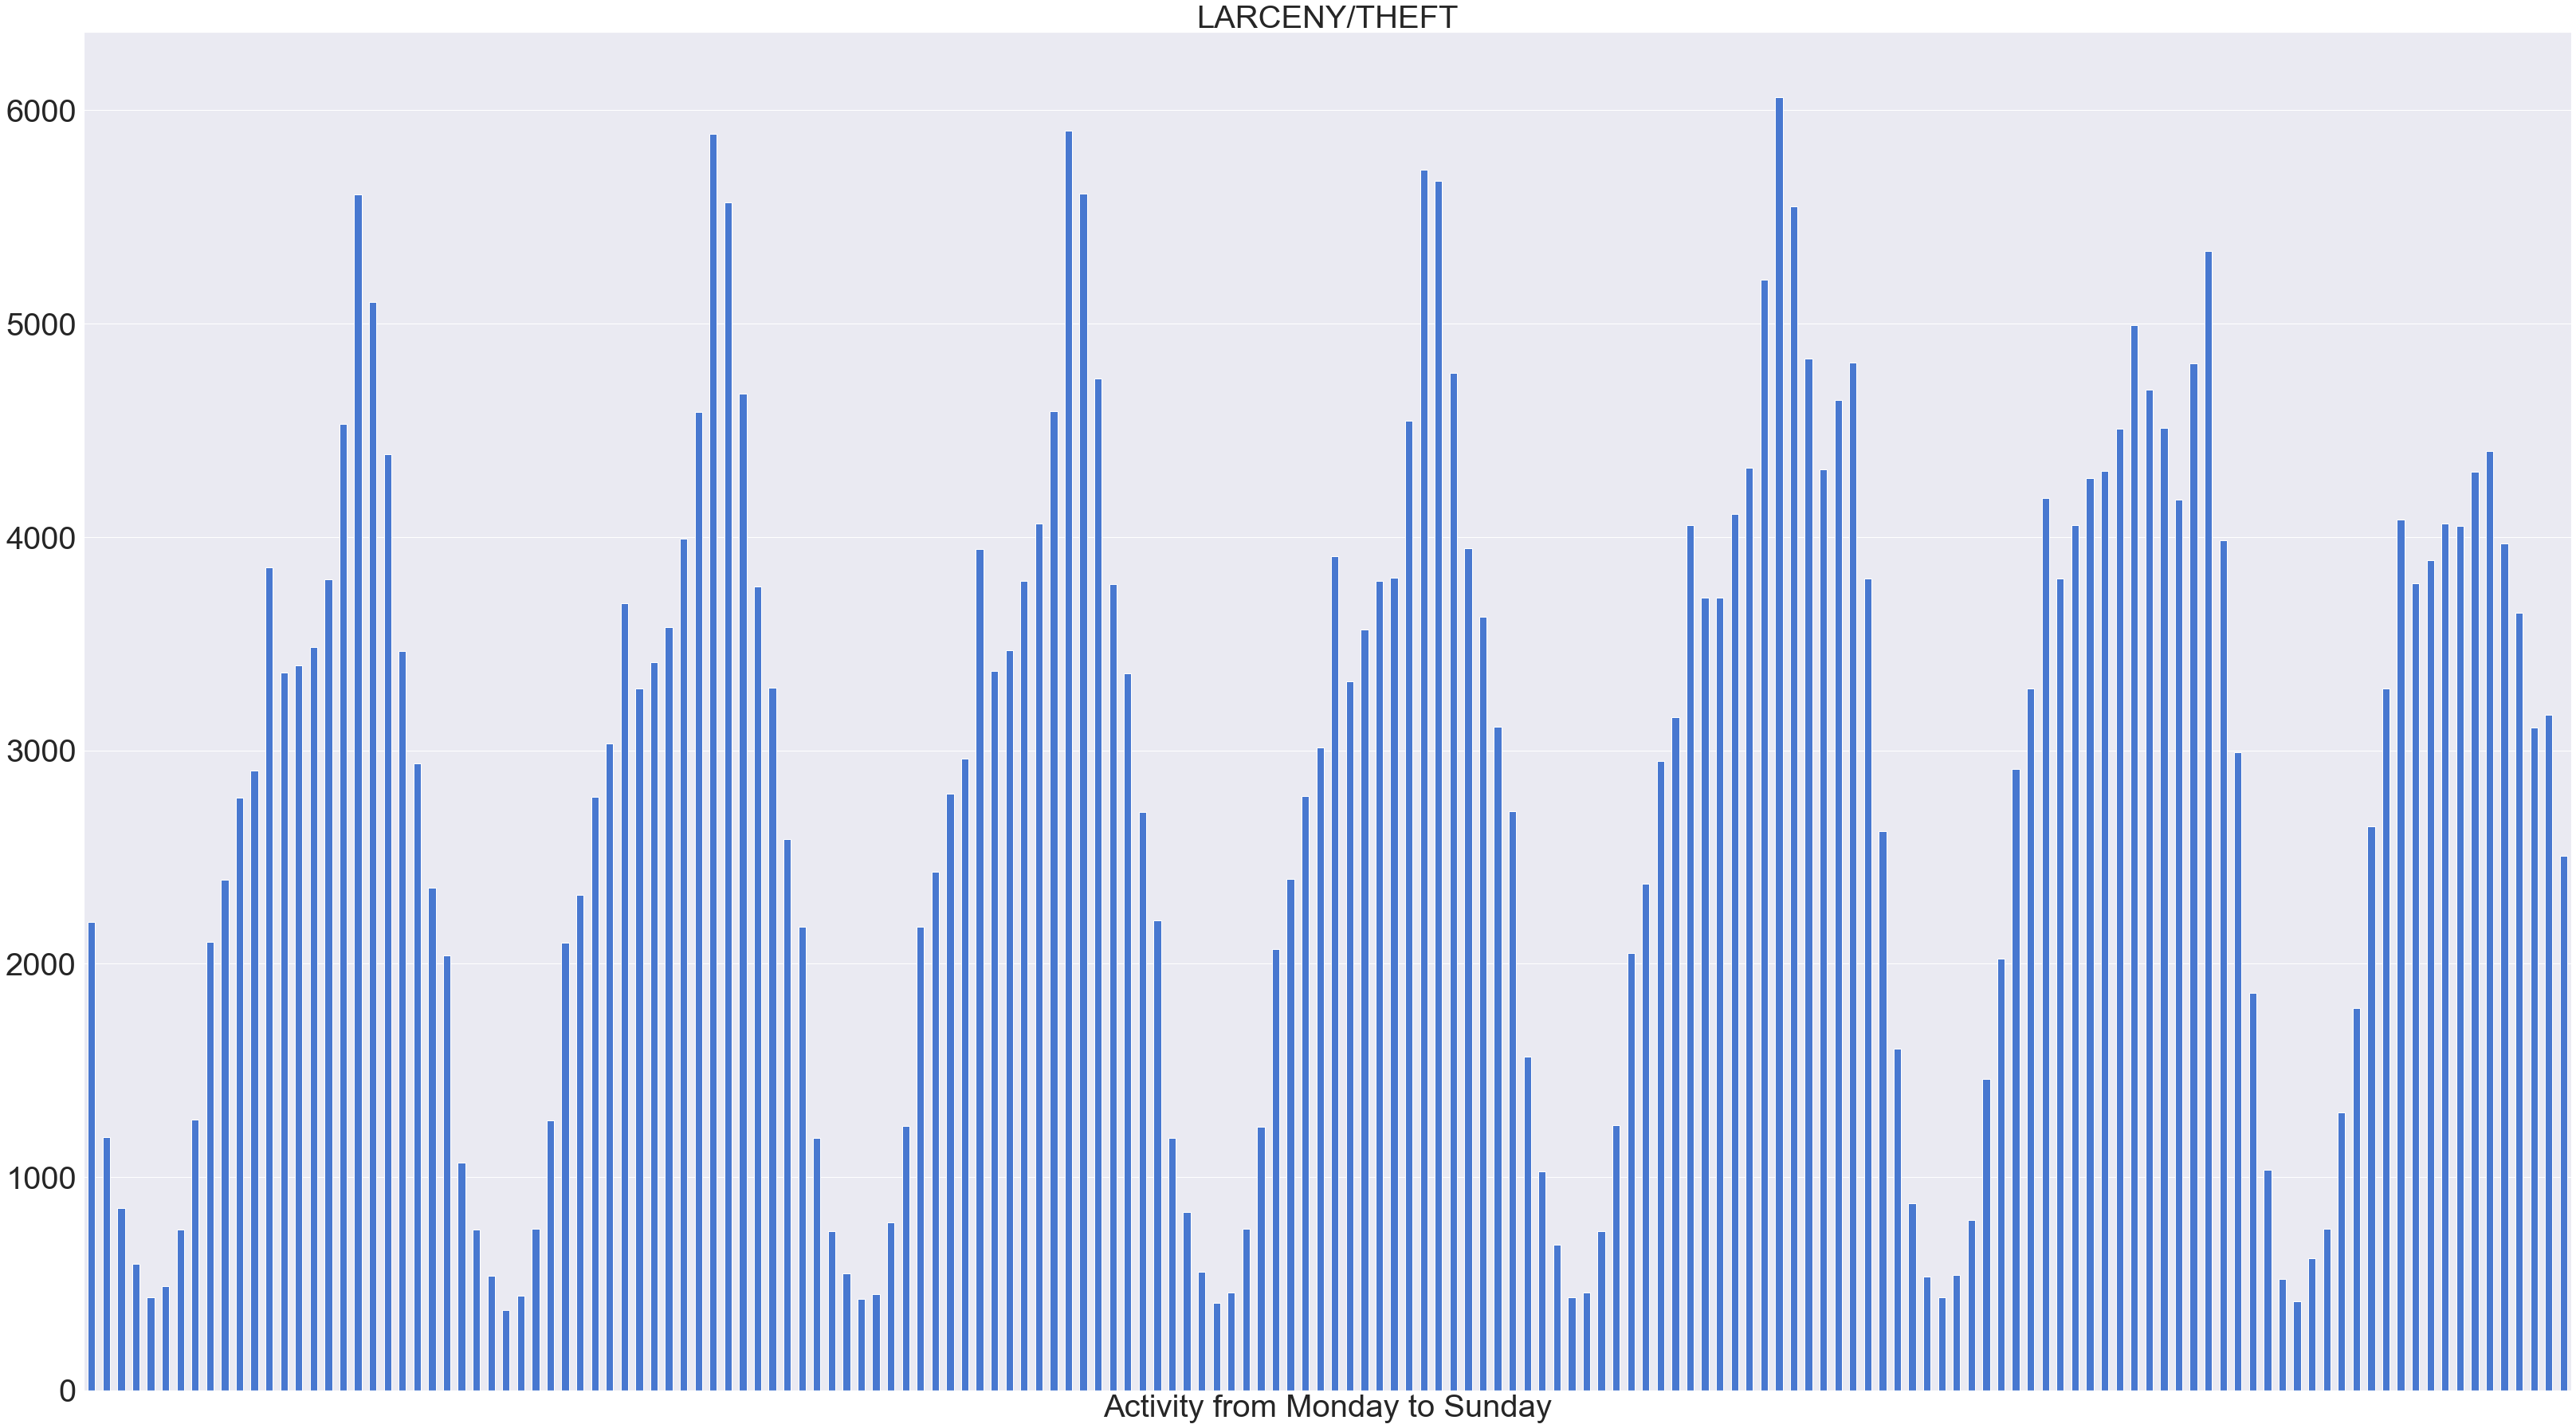

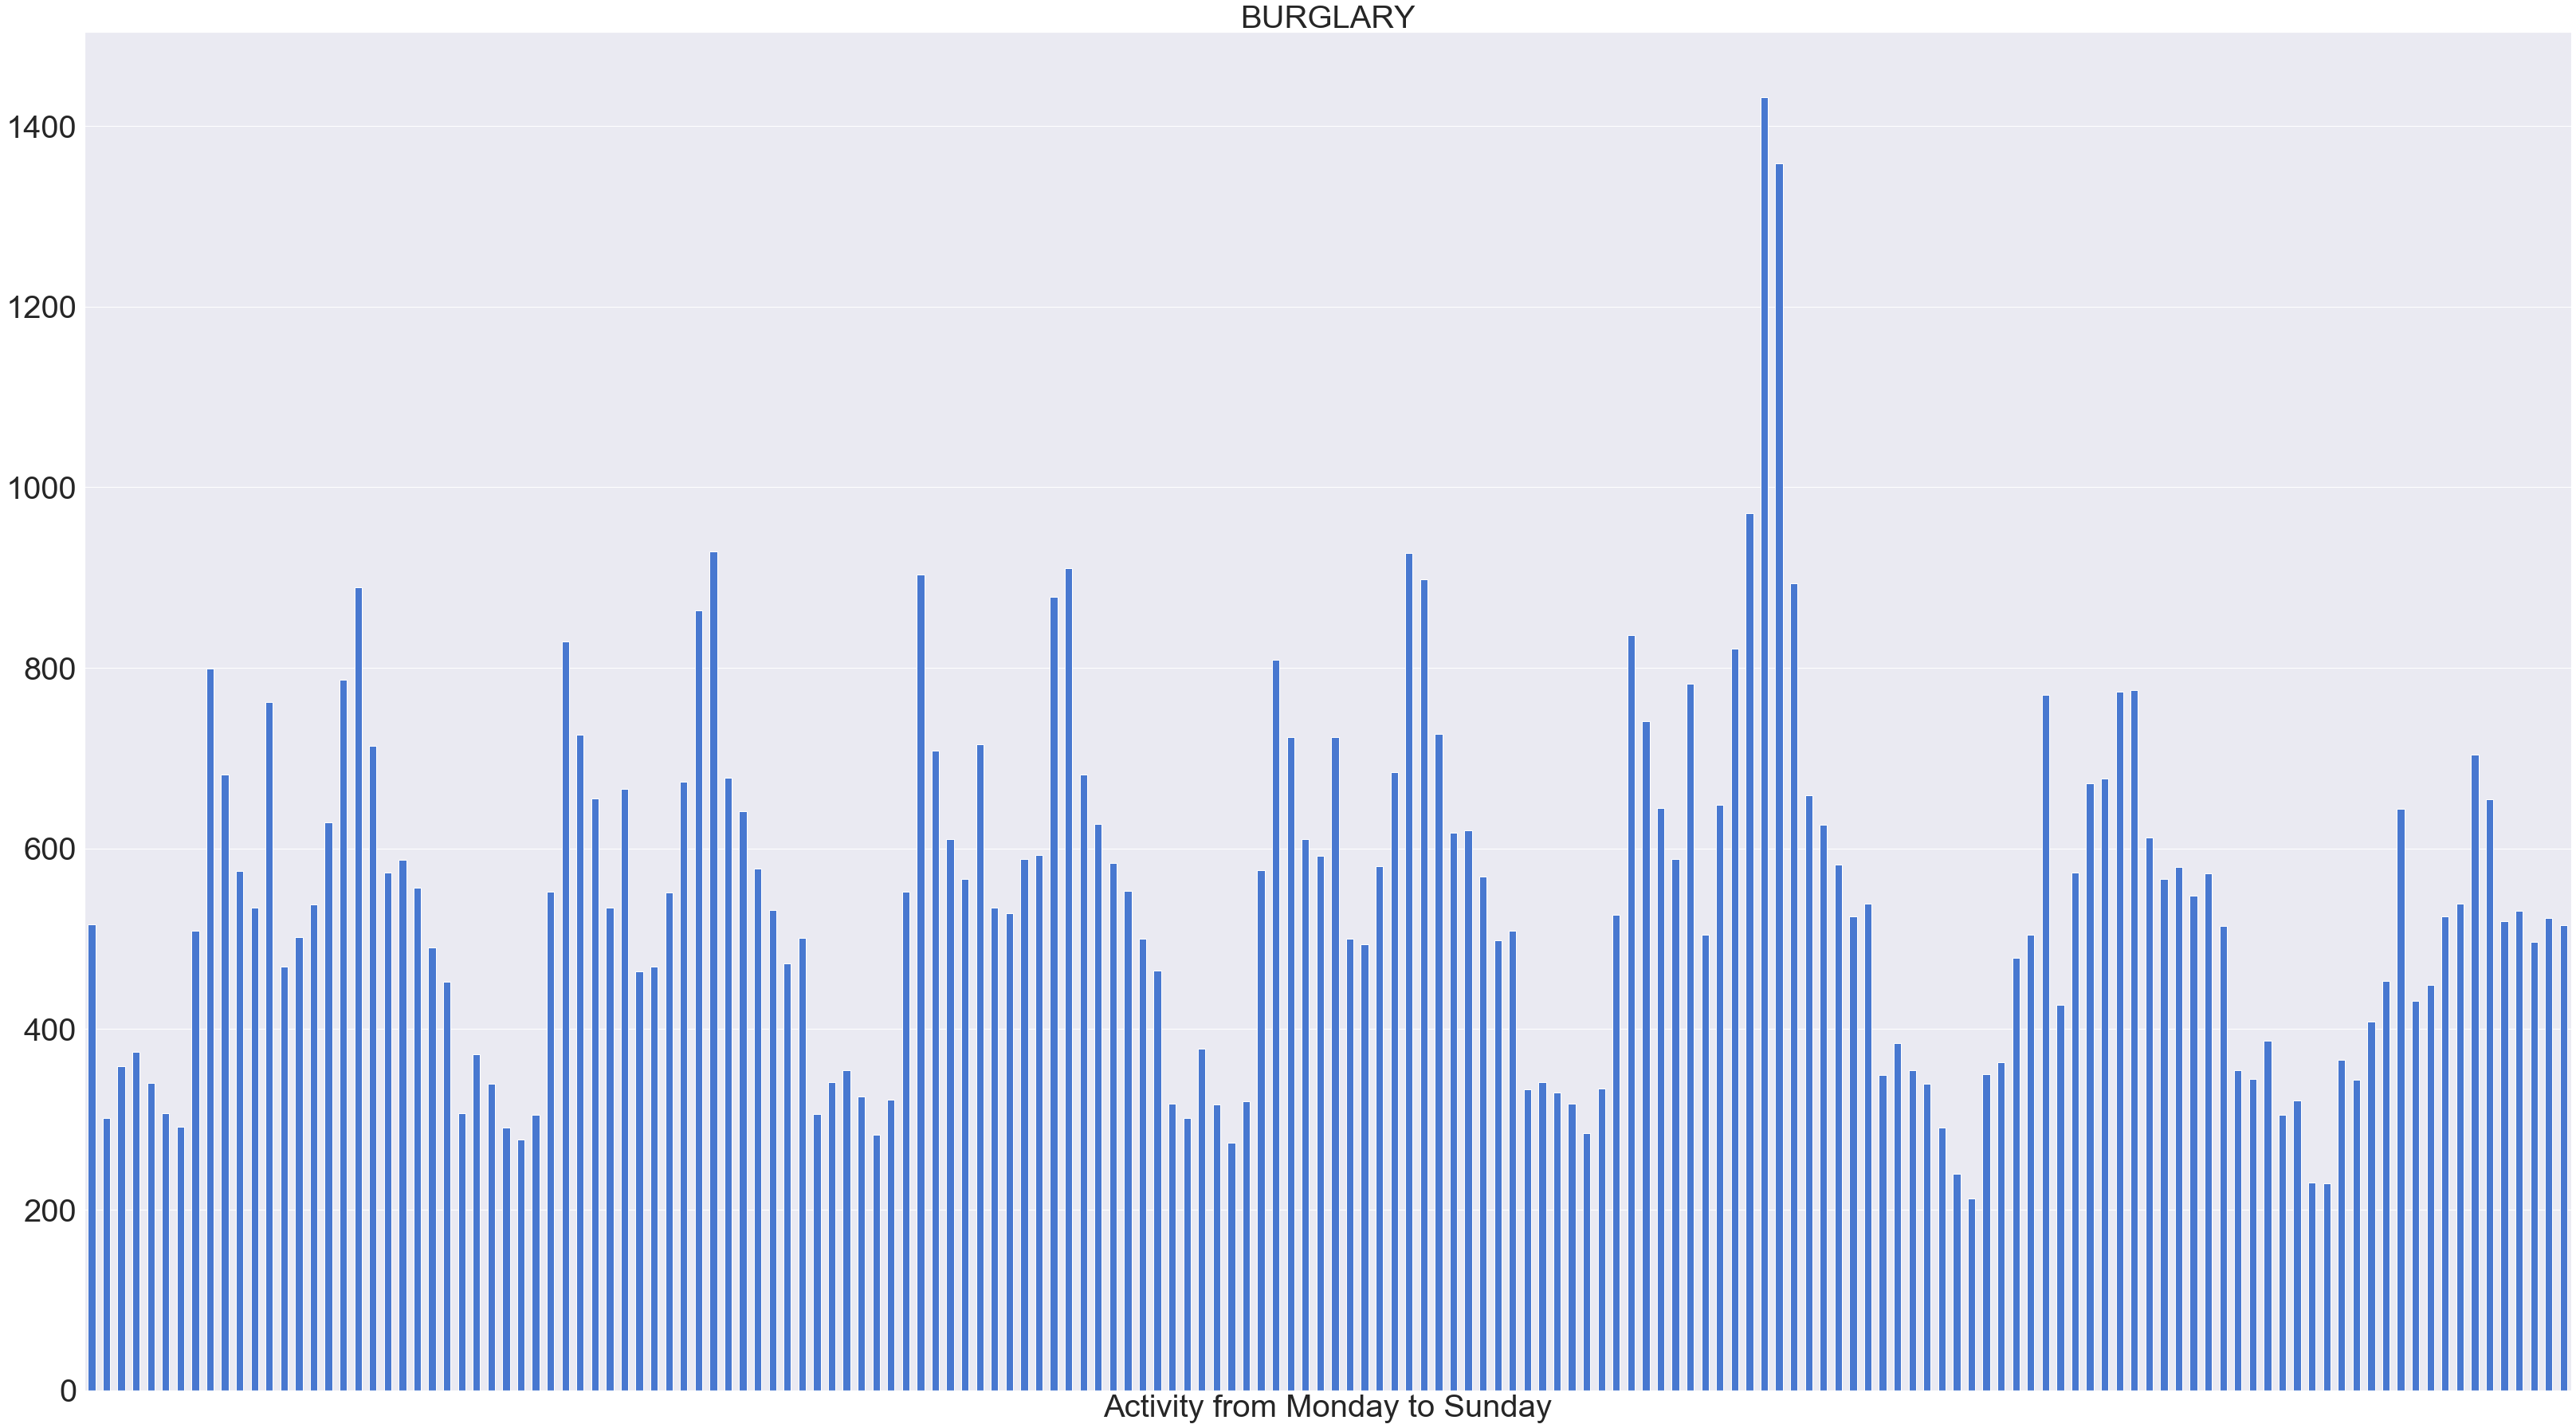

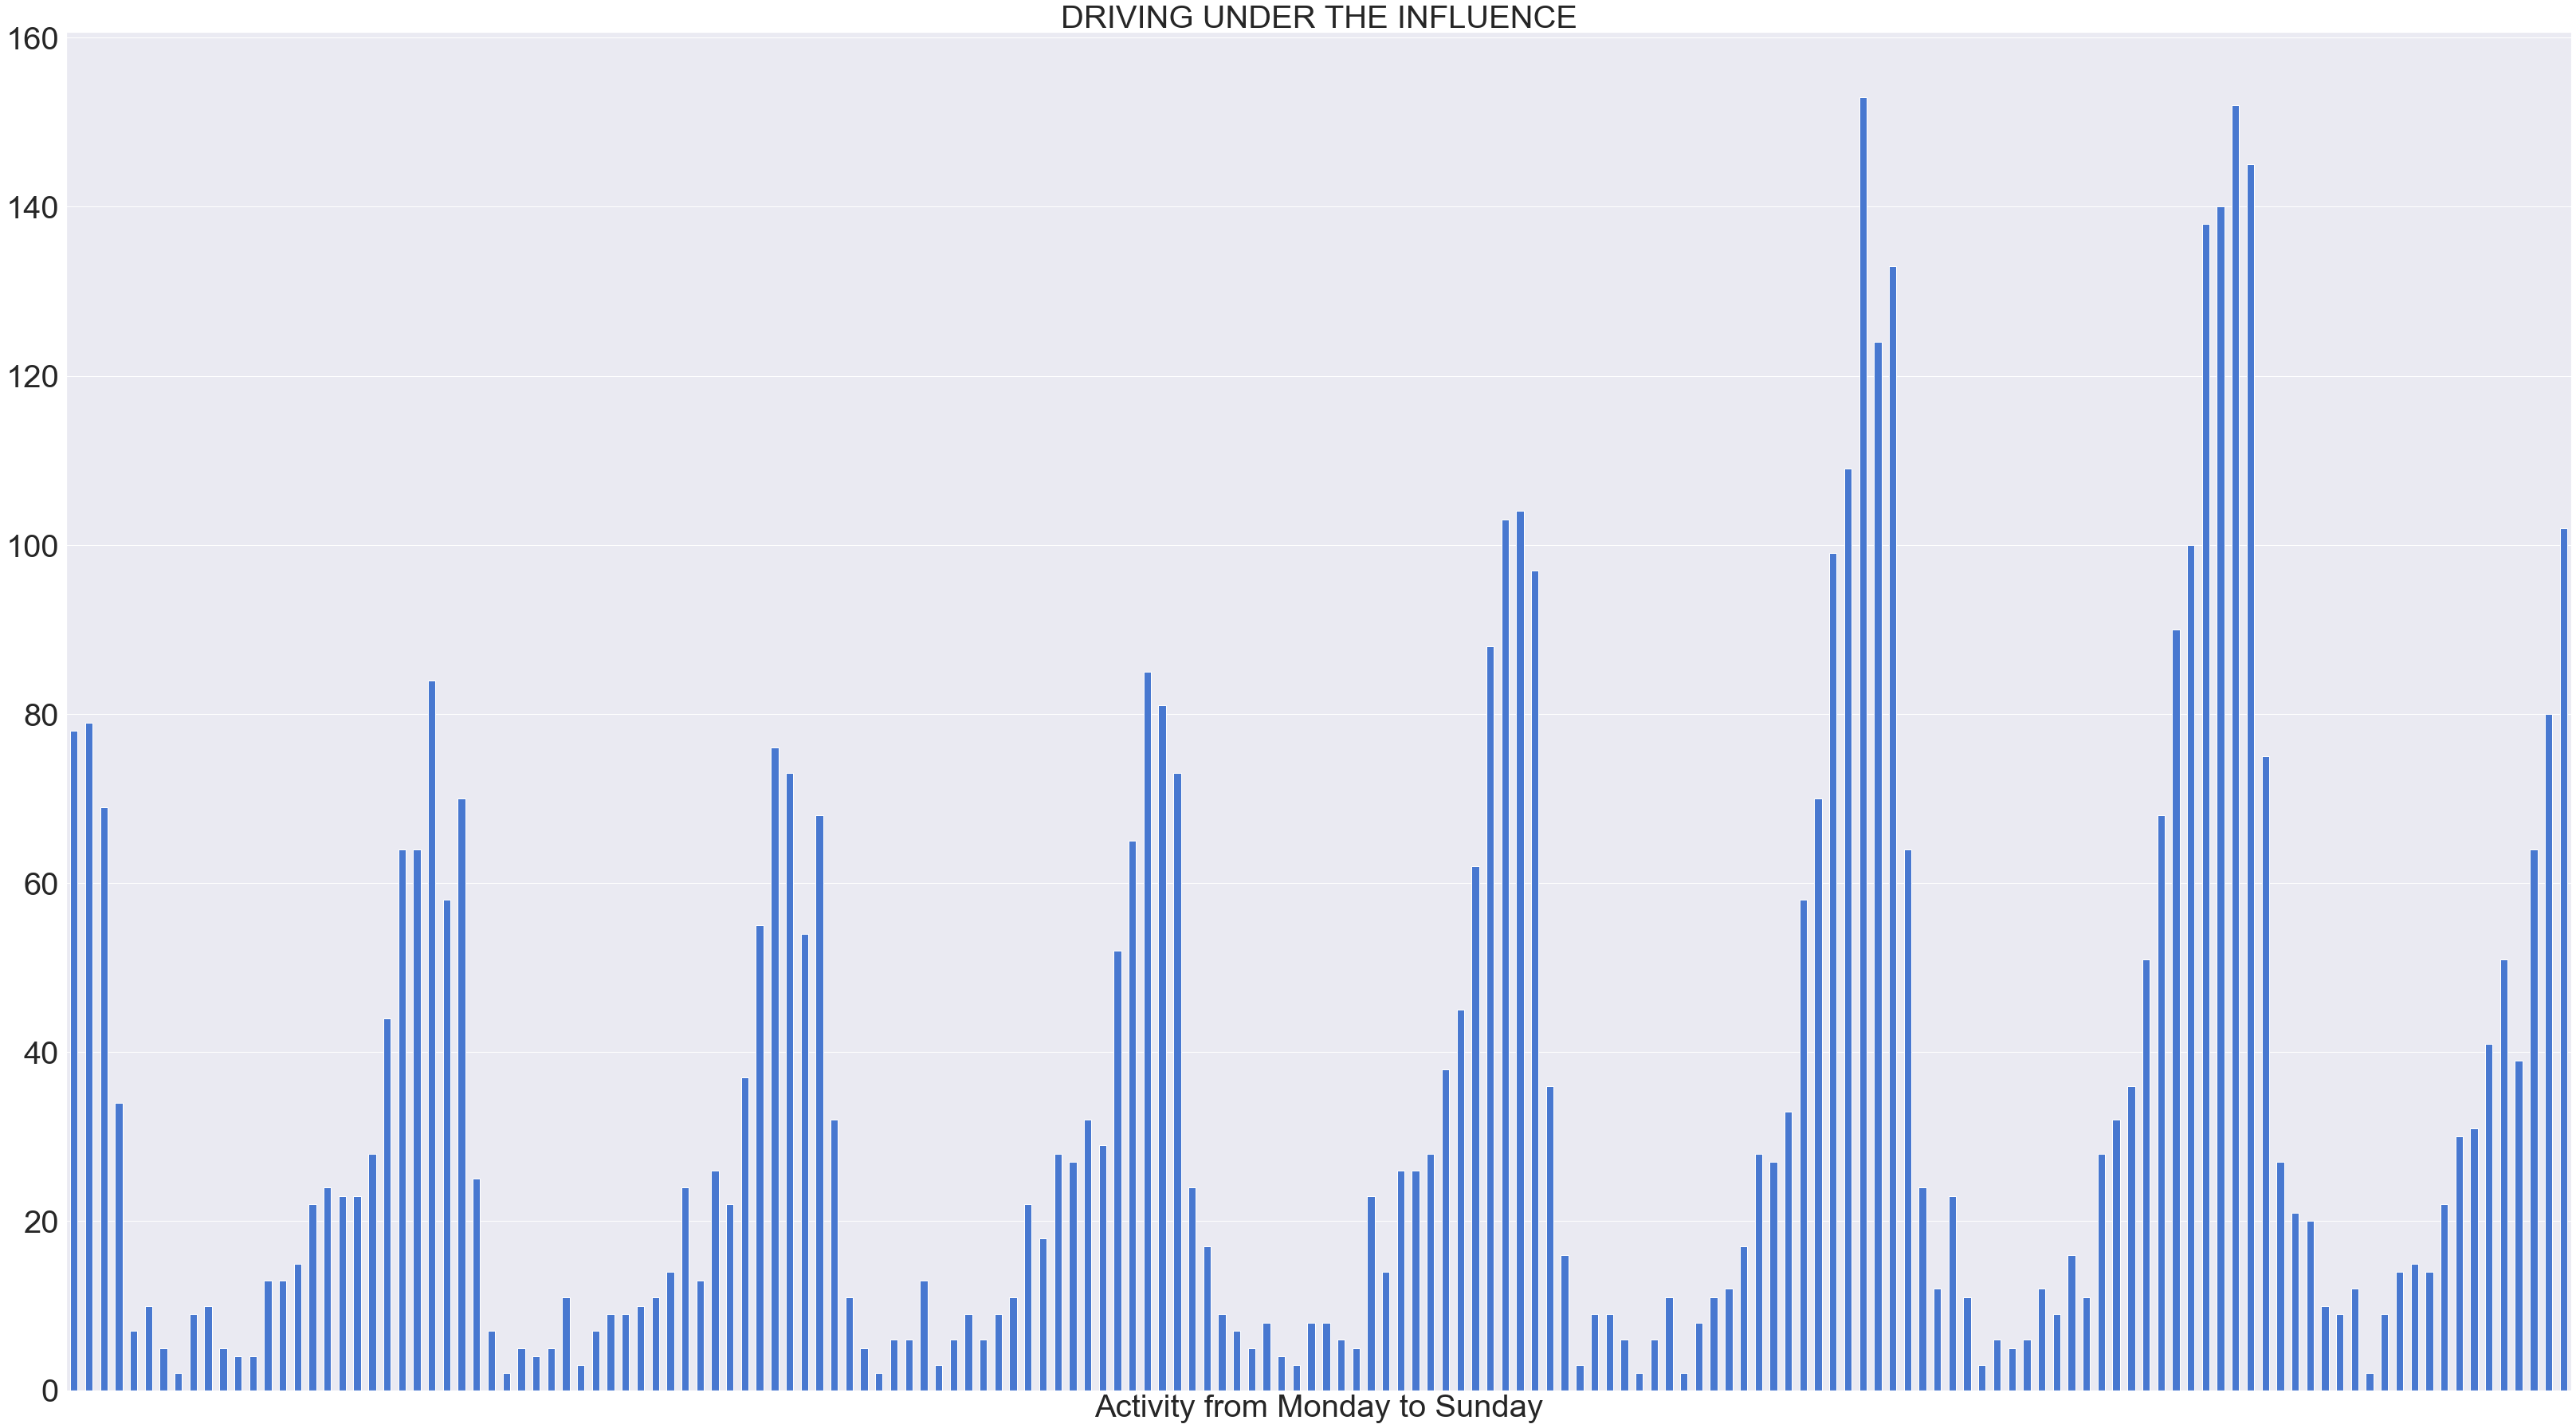

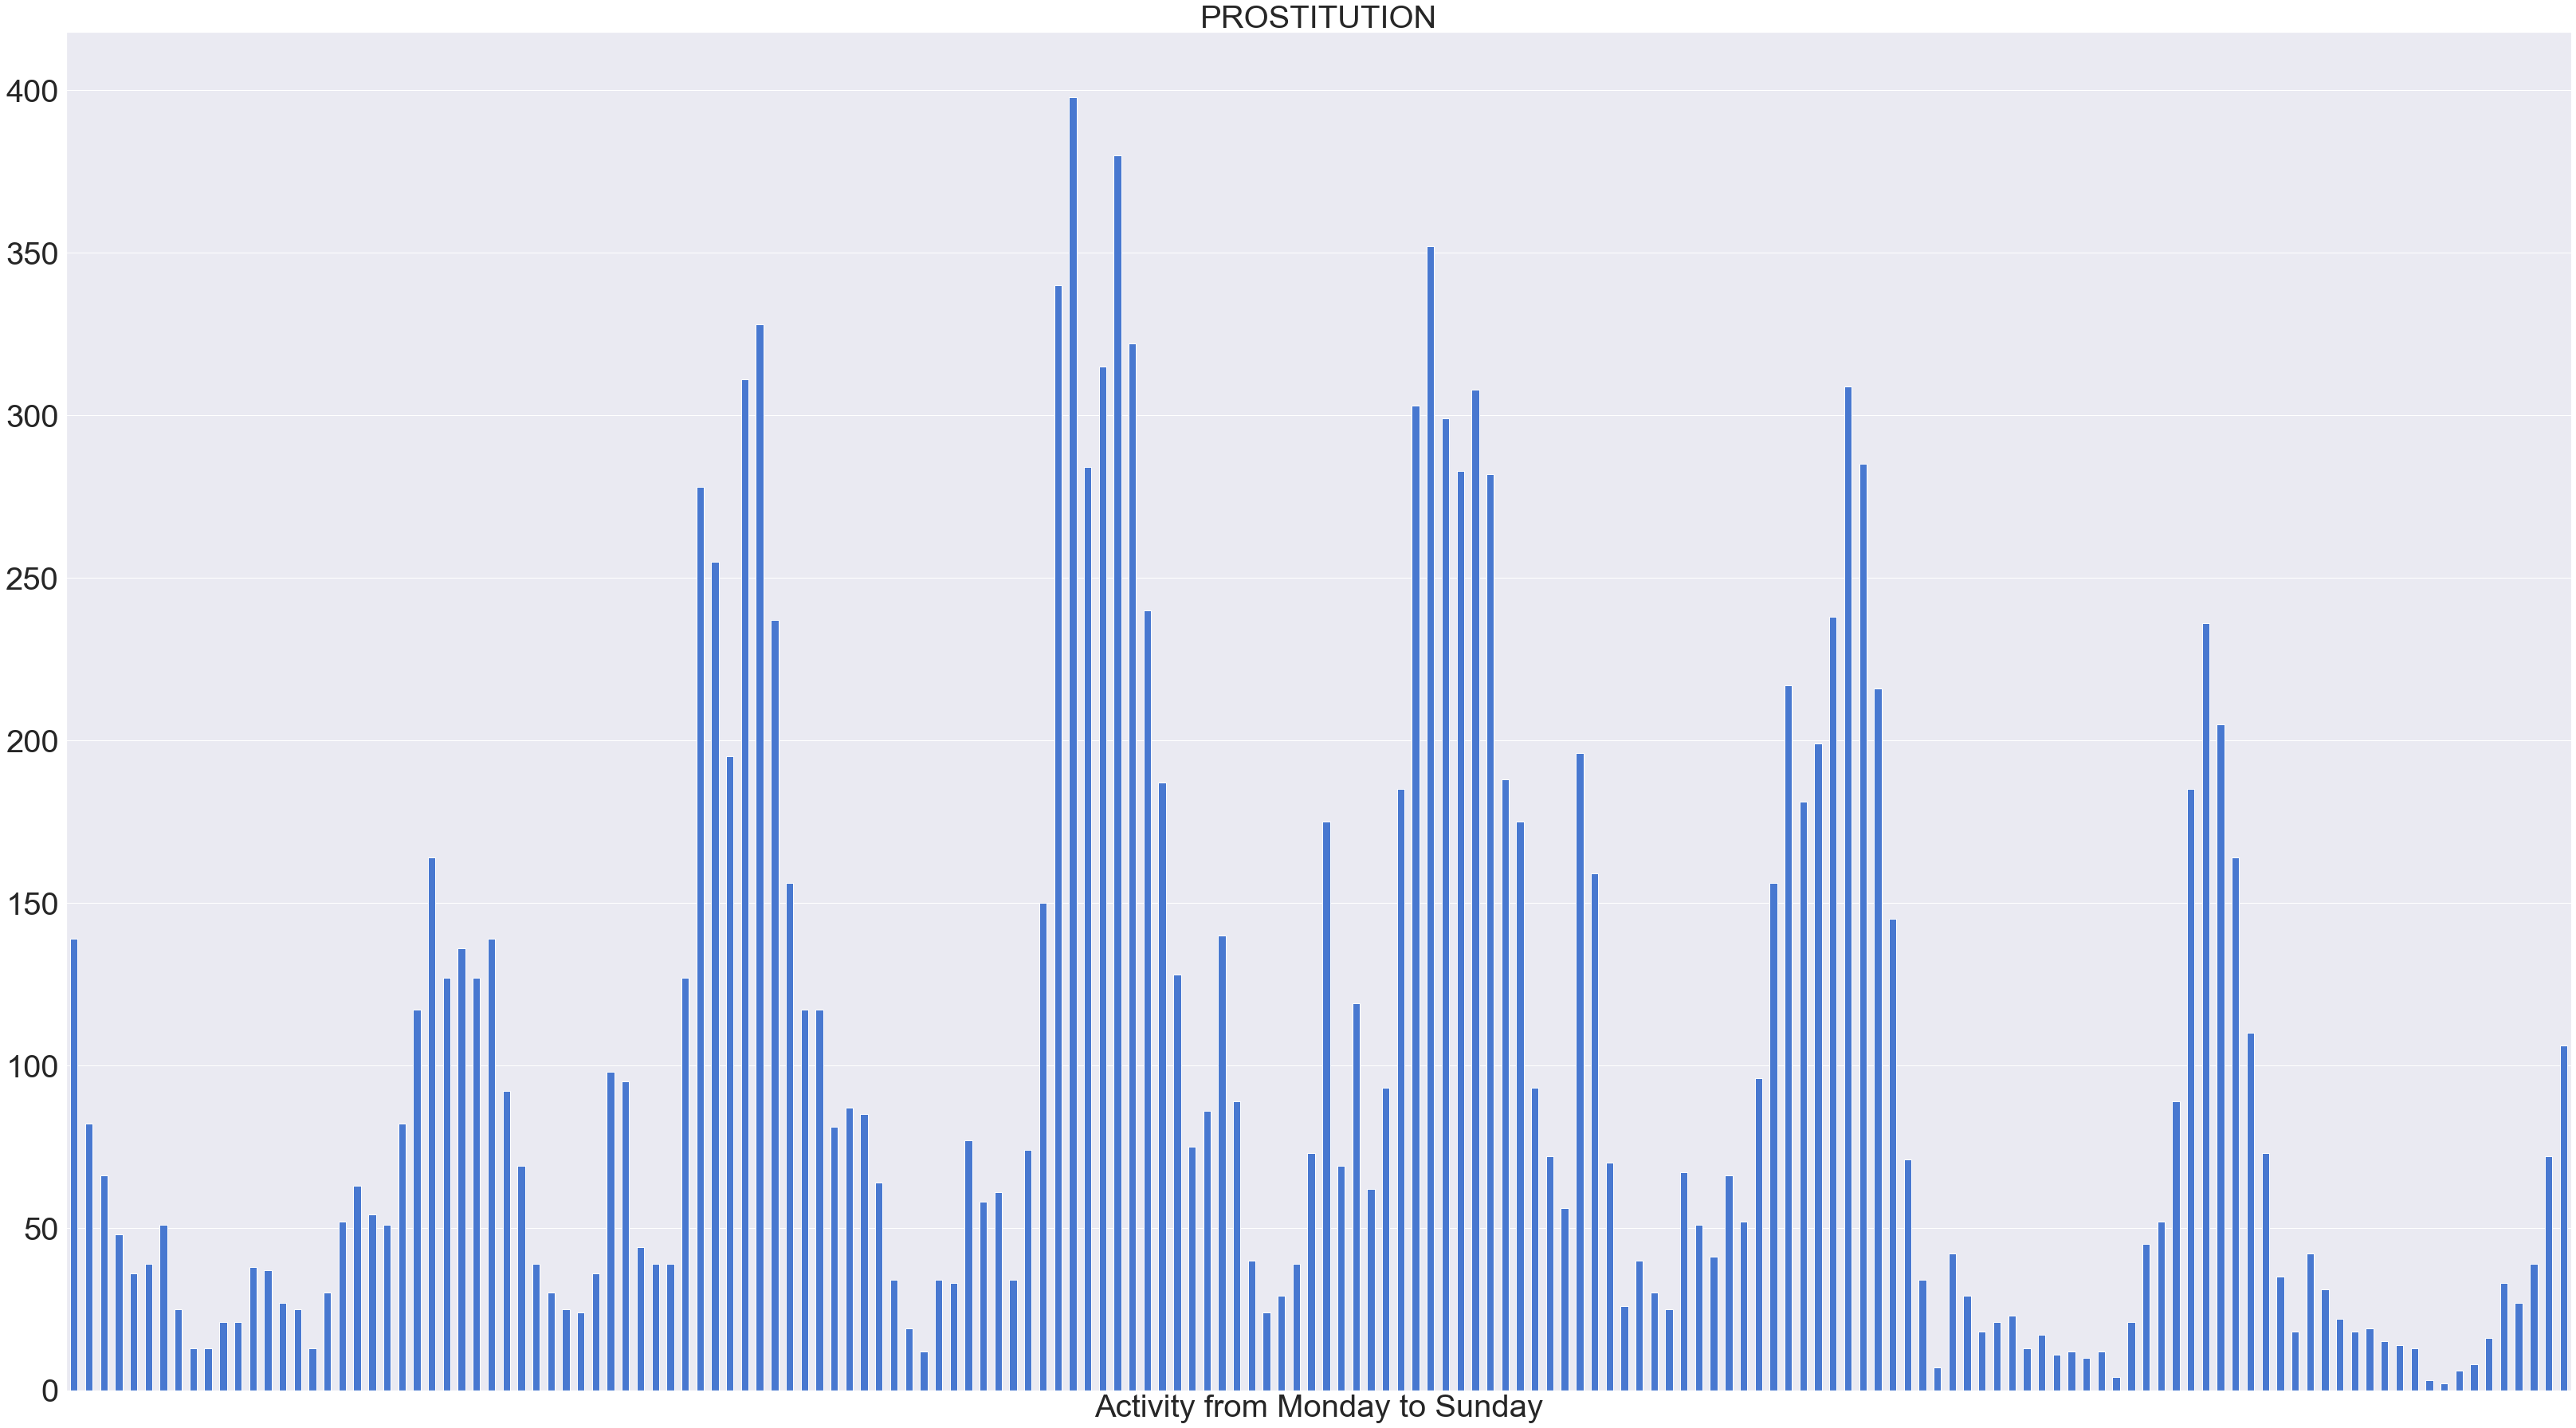

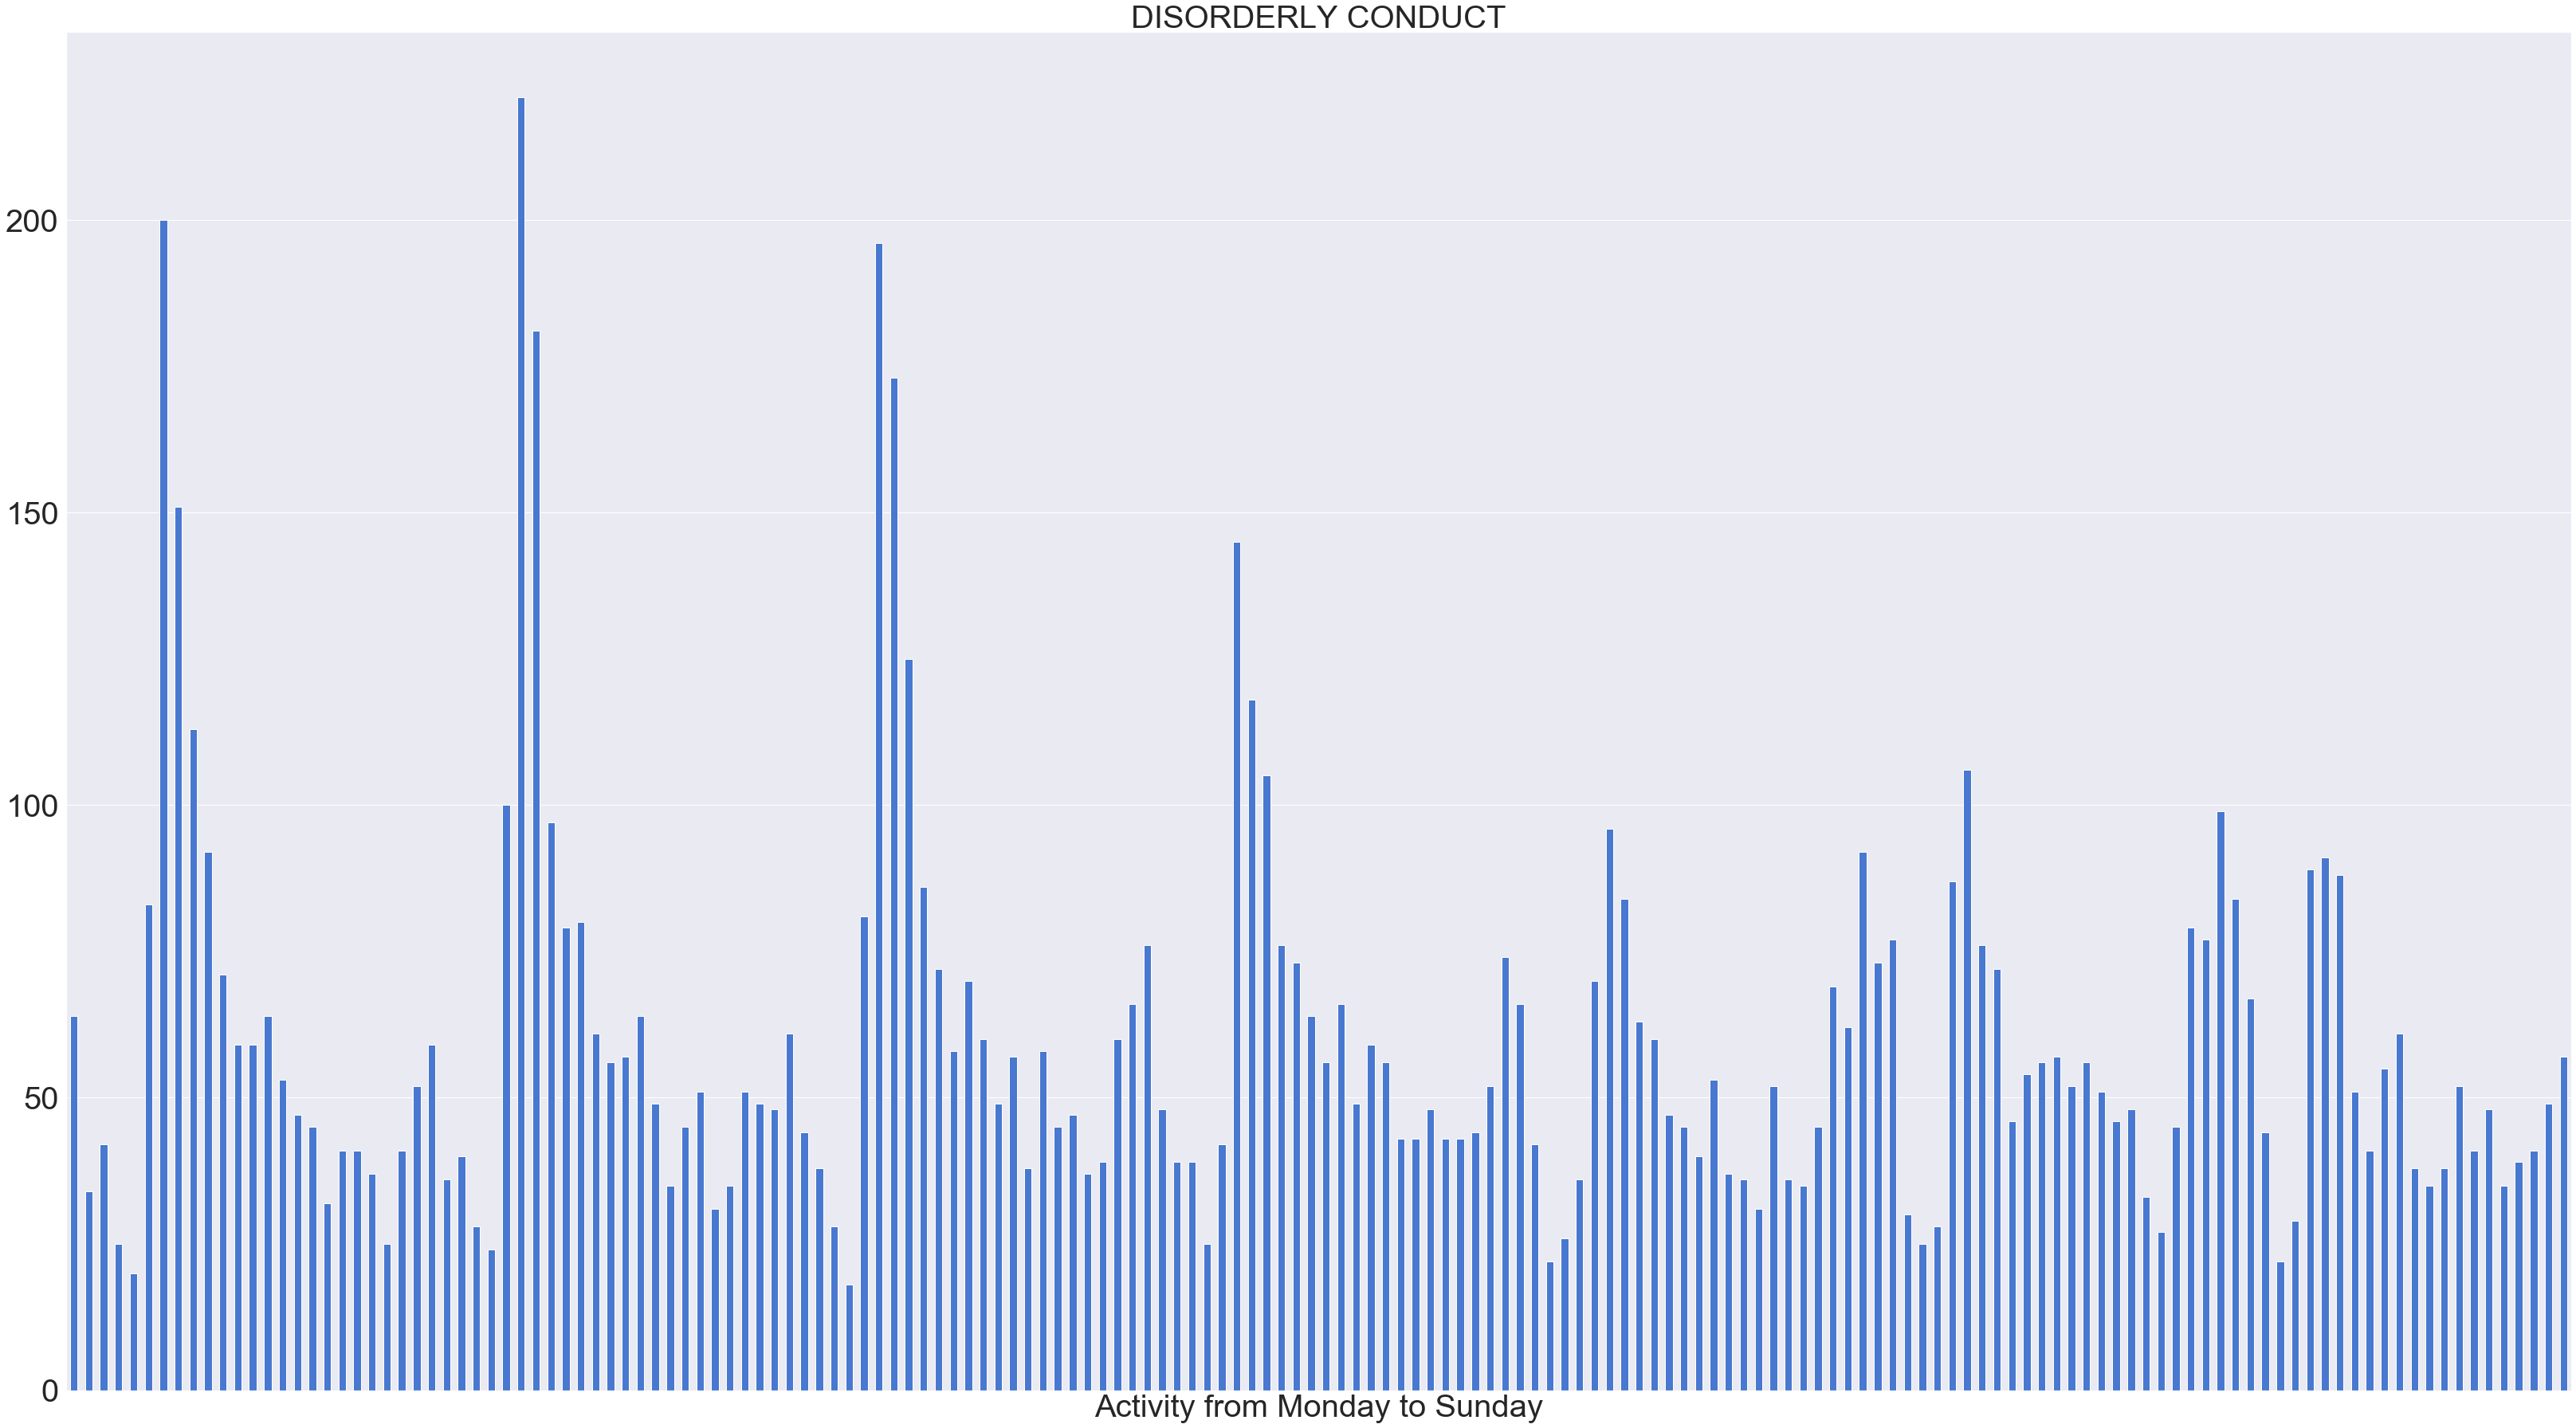

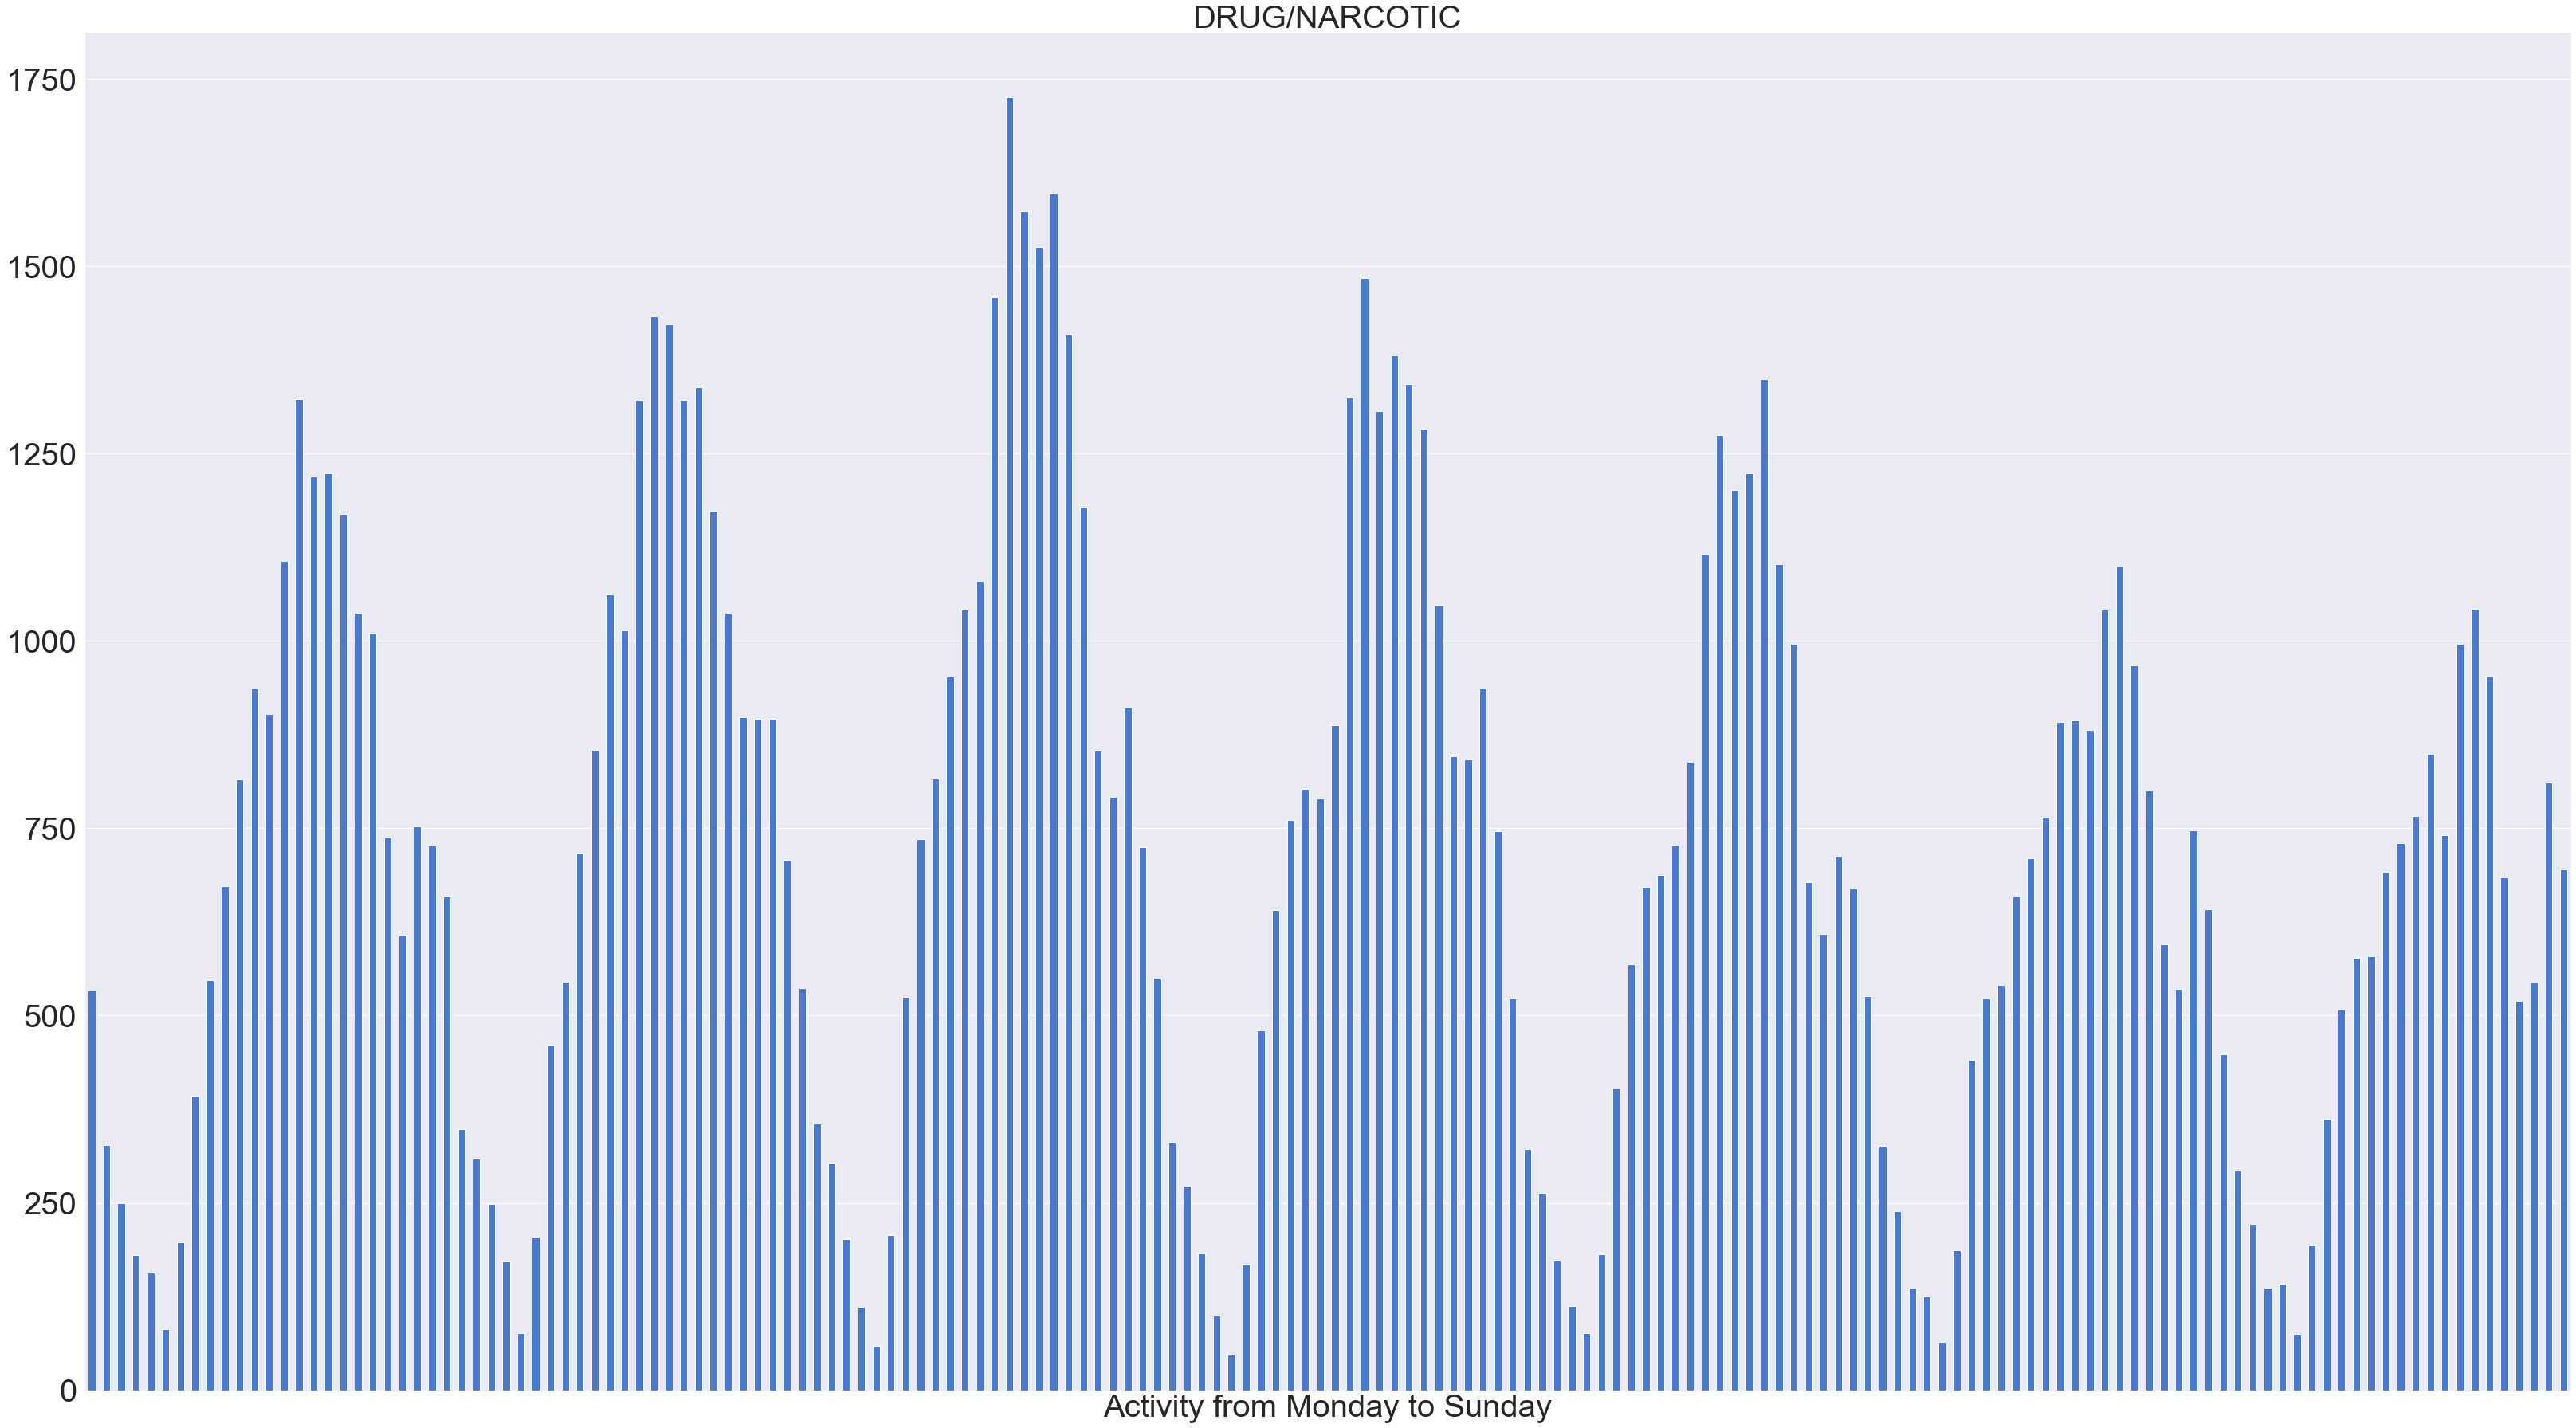

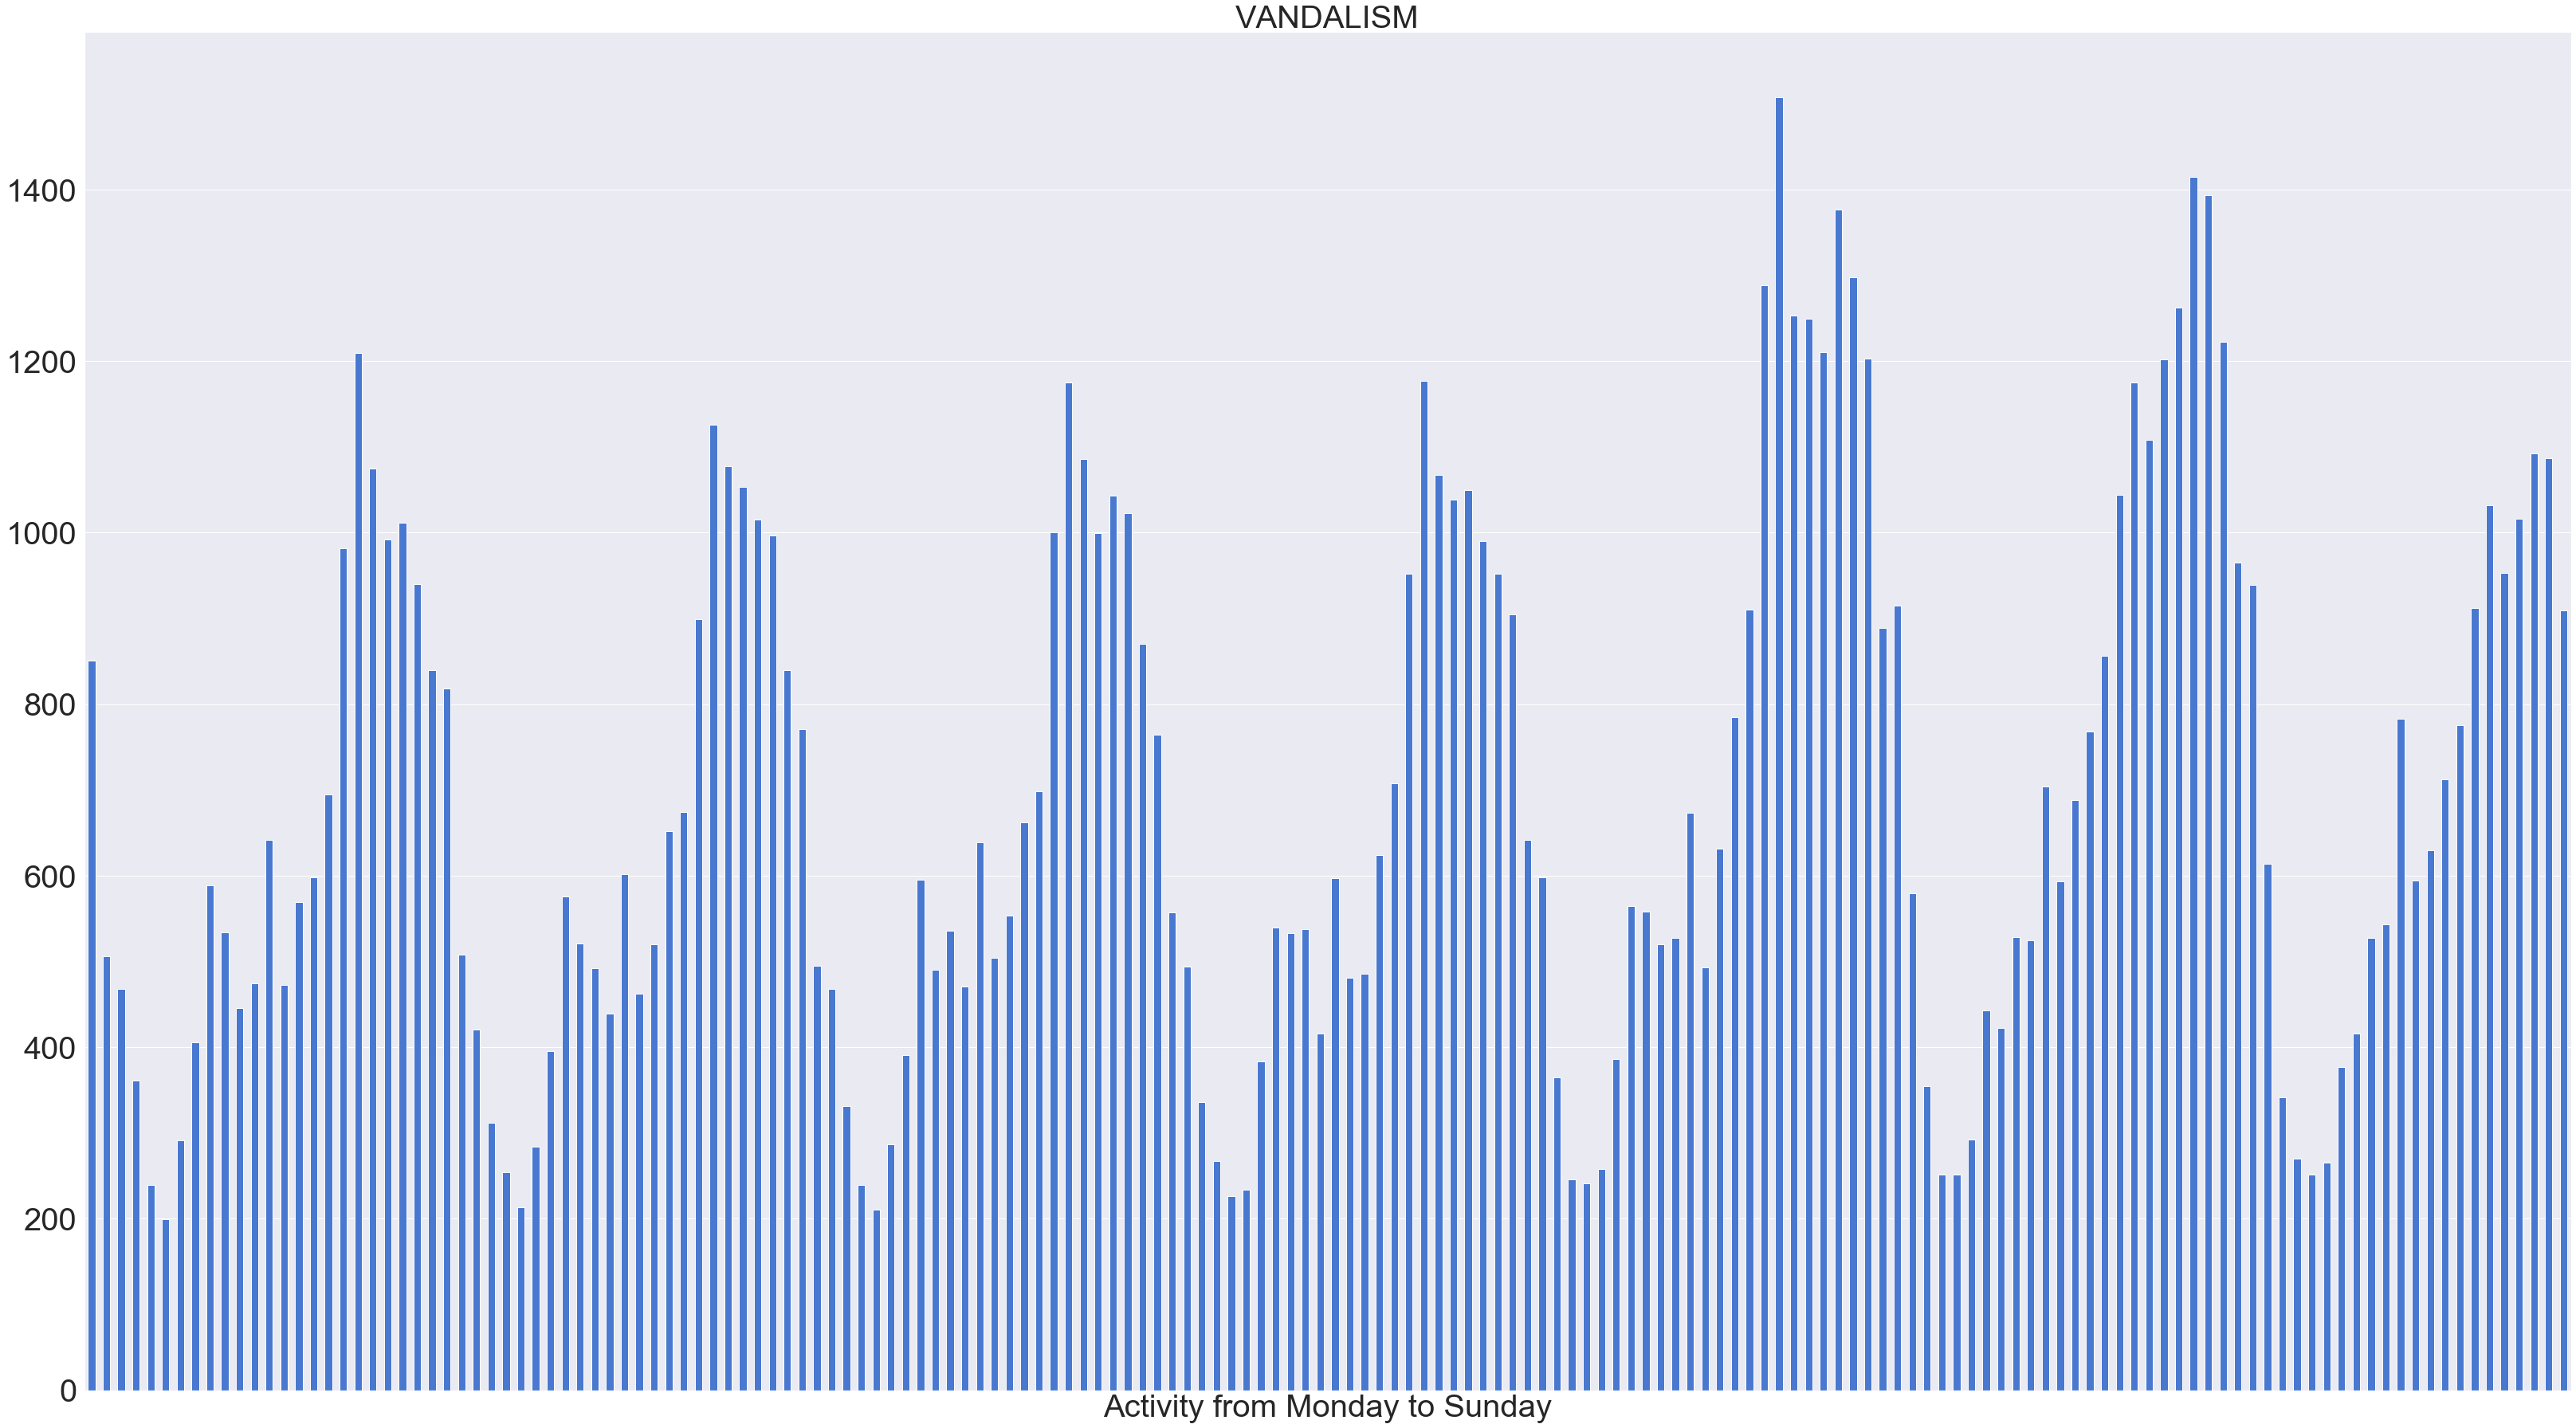

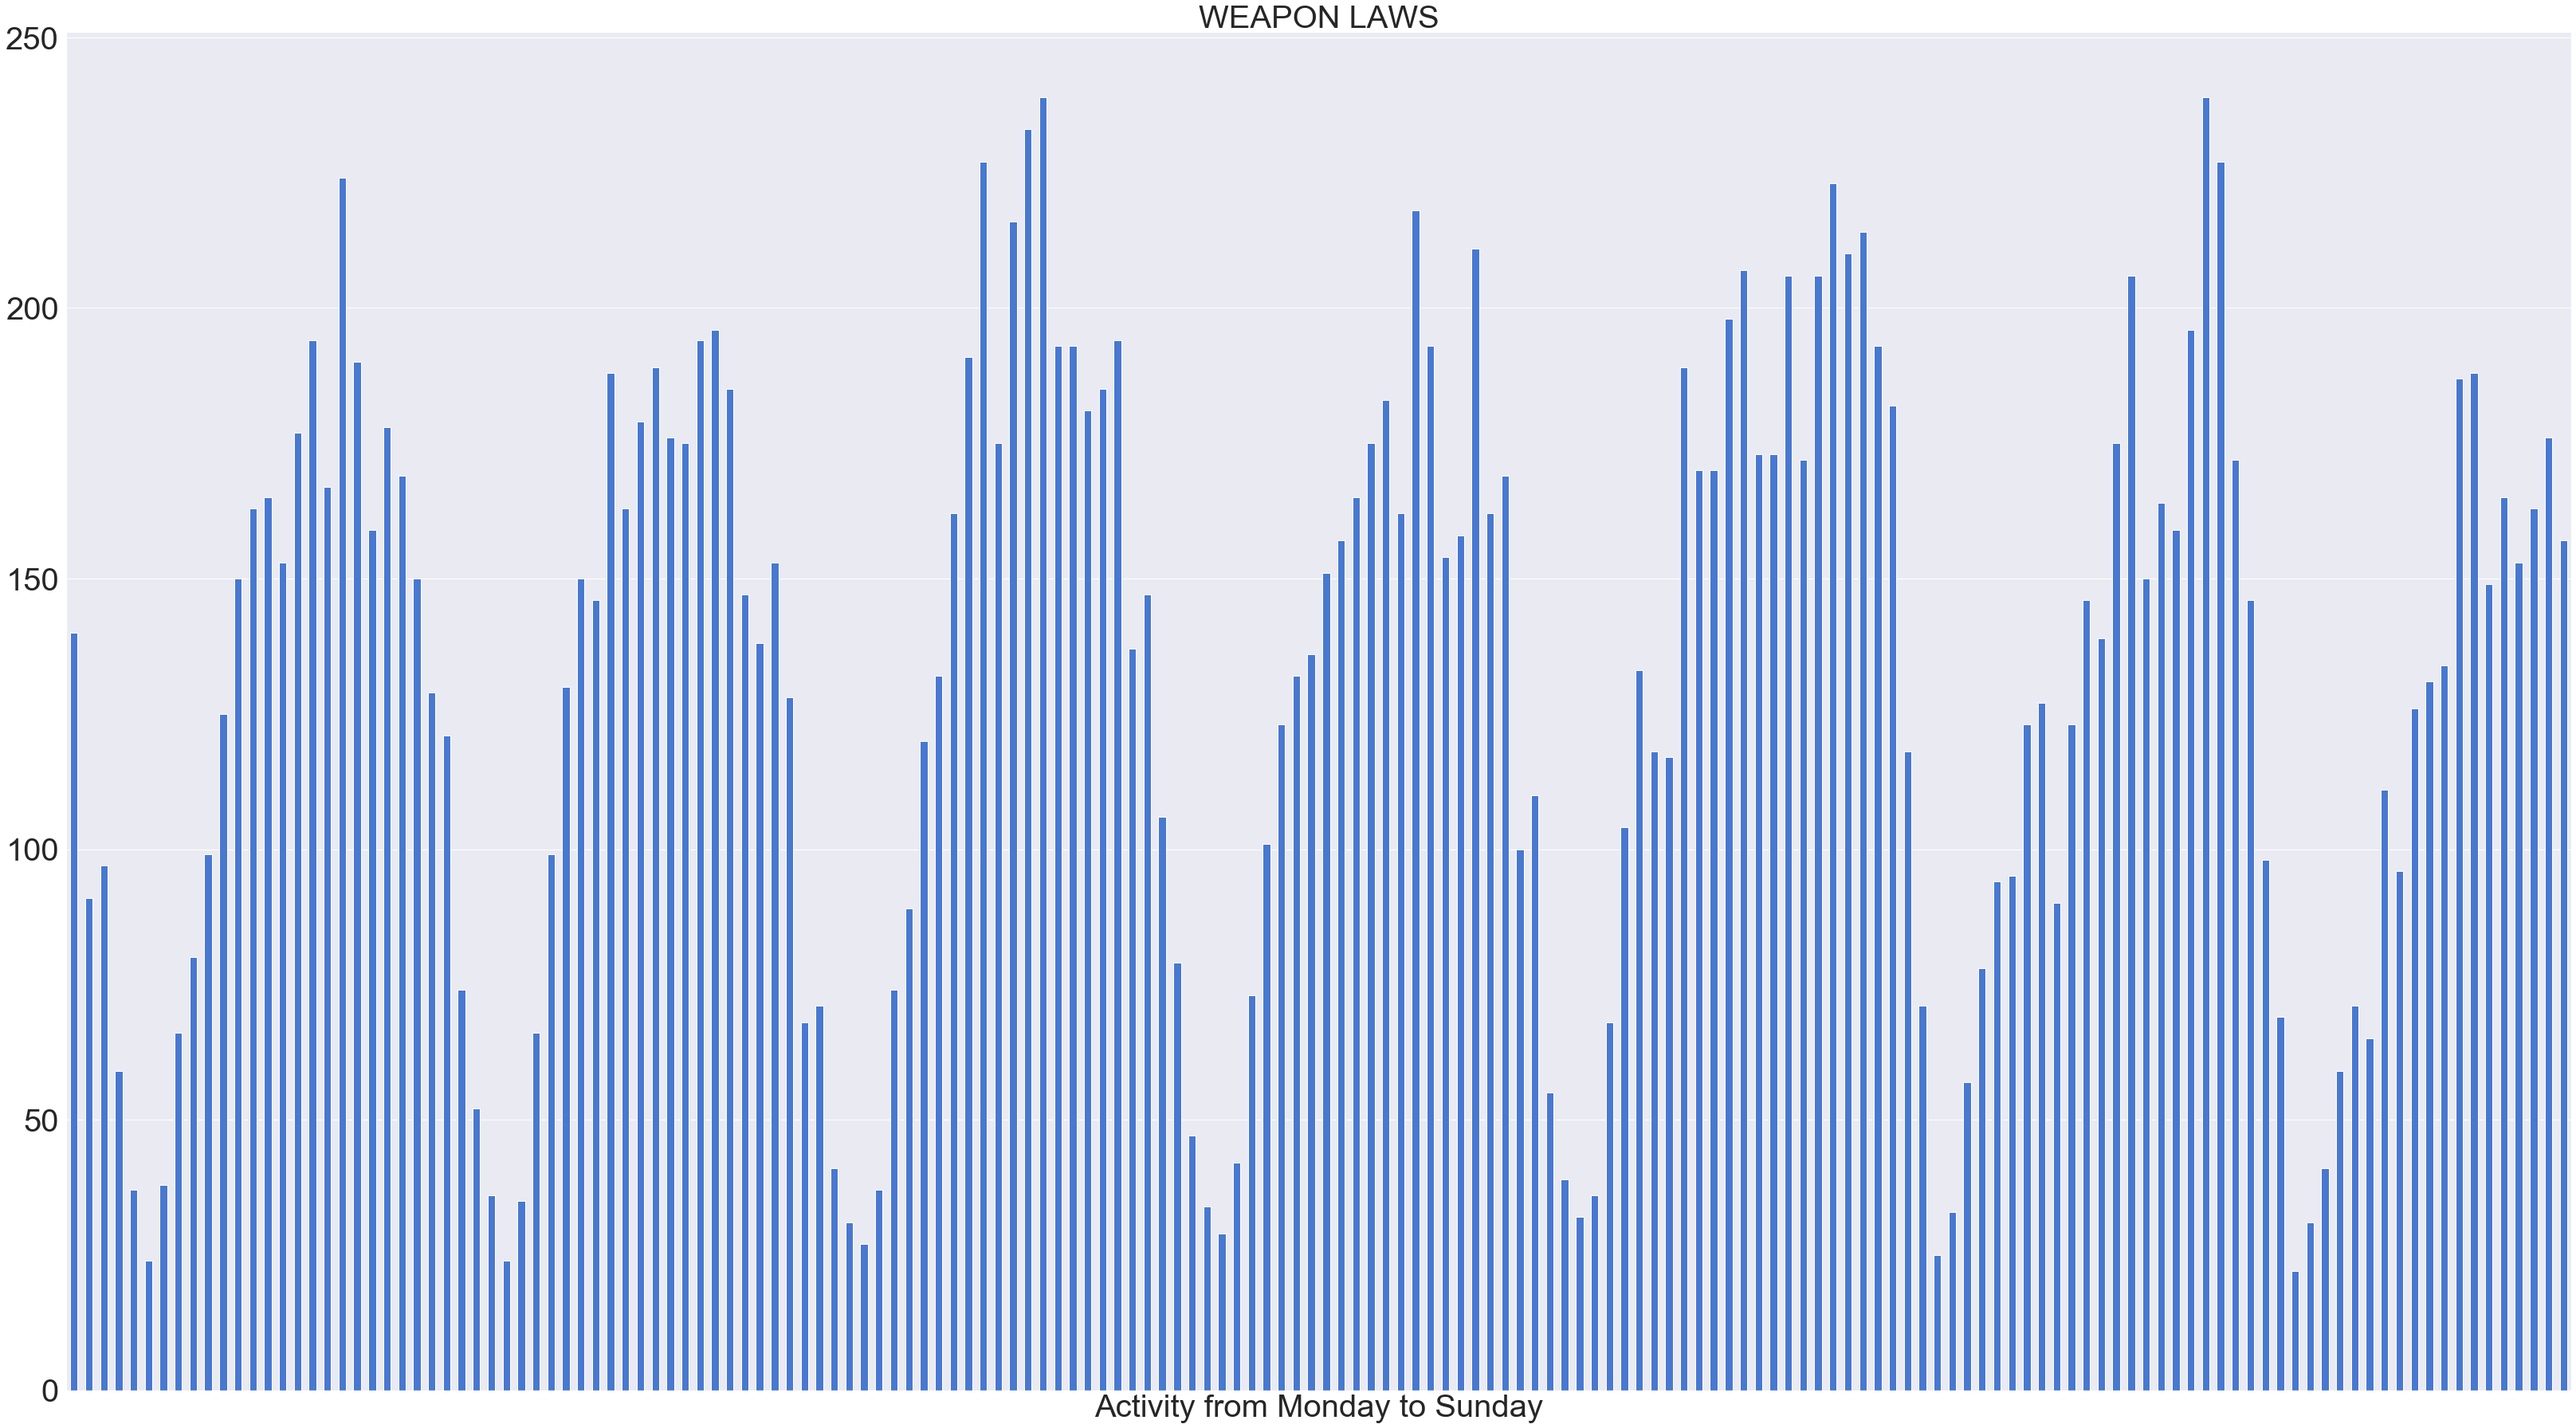

In [10]:
# plt.figure(figsize=(25,25))

for i, elem in enumerate(focuscrimes):
#     plt.subplot(7,2,i+1)
    plt.figure(figsize=(45,25))
    df_hour = df[df['Category'] == elem]
    
    df_hour.groupby(['DayOfWeek',df['Time'].dt.hour]).size().plot(kind='bar') #Grouping by two criteria, day of the week and hour in the day. 

    plt.title(elem,fontsize=40)
    plt.yticks(fontsize = 40)
    plt.xticks([])
    plt.xlabel('Activity from Monday to Sunday', fontsize = 40)
    plt.tight_layout()
    plt.show()

## Part 2: Thinking about data and visualization

$\textit{What is the difference between data and metadata? How does that relate to the bike-example?}$

Data is content, and metadata is context. Data is a collection of information such as observations, measurements and facts. It gives you the ability to discover patterns and trends. Metadata is often describes as "data on data". Metadata refers to specific details of the data. Metadata allows for greater data quality and discovery, and allowing for better understand of the data since it gives context to the data.

For the bike example introduced in video lecture 1 a gps file from his Garmin tracker has been taken as an example. The data of the computer is the gps coordinates (lon and lat). The metadata is data on data. for this example it is e.g the file type (.gpx), file name, date and time. Also by infering knowledge of the earth it is possible to show the altitude of the ride based on the gps coordinates which then also is metadata. 


 




$\textit{Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.
Mention something that the human eye is very good at.}$ 
$\textit{Can you think of something that is difficult for the human eye. Explain why your example is difficult.}$

Sune states the eye is a great tool for data analysis and give the example of outlier detection such as identifying a tigers tale sticking out on the road. We agree in this statement that the eyes ability to detect patterns and outliers plays an important role in evolution and human survival. In data science the statistical values such as mean and variance can trick one as it was seen in Anscombe's quartet investigated in class ([see here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)), where it was observed the different graphs had same statistical values but in a graphical illustration it can quickly be detected by the eye that the data is very different. Therefore the eye works very well as a data analysis tool.

The eye lacks the ability to process raw data. It is very dificult to find patterns in raw data and thus nescessarily to use visual tools. E.g finding correlation between different data is very difficult to see from raw data but in a simple scatter plot it can quickly be observed. 



$\textit{Simpson's paradox is hard to explain. Come up with your own example - or find one on line.}$

Simpson's paradox is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

A simple example to illustrate the paradox, is imagining two restaurants, Carlo's and Sophia's. By looking at the reviews of the two restaurants separetely by male and female, Carlo's restaurant seems to be the clear winner based on male and female reviews. But if the data is combined Sophia's is the most recommended restaurant. This is thus Simpson's paradox where a restaurant can be both better and worse than its competitor. Table to illustrate the effect:

|          | Recommend Sophia's | Recommend Carlo's |
|----------|------------------|-------------------|
| Male     | 50/150 = 30%     | 180/360 = 50%     |
| Female   | 200/250 = 80%    | 36/40 = 90%       |
| Combined | 250/400 = 62.5%  | 216/400 = 54%     |




$\textit{In your own words, explain the difference between exploratory and explanatory data analysis.}$

Exploratory analysis is the initial step in data analysis. It usually consist of getting to know the data by simple statistics and data visuliazation to use the human eye to find patterns in the data. Finding trends, correlations and outliers. Exploratory analysis is often the preperation for further in depth research since the initial analysis hopefully shows interesting trends/patterns as a base for further research. It explores the data.

Explanatory analysis seeks to explain the findings from exploratory by answering "why" and "how". It is thus a more in depth analysis of patterns discovered. 



$\textit{Excercise: Questions for the second video lecture.}$

$\textit{As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation.}$ 
$\textit{Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. }$
$\textit{Can you think of an example where it fails (and visualization works)?}$

Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. 1 indicates a total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

Pearson correlation between variables X and Y is calculated by:
$$\rho_{X,Y}=\frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}=\frac{\sum_{i=1}^n(X_i-\overline{X})(Y_i-\overline{Y})}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2}\sqrt{\sum_{i=1}^n(Y_i-\overline{Y})^2}}$$

Pearson correlation looks for linear relationship between two variables. A common pitfall is thus if the relationship between the variables are nonlinear. A pearson correlation value for a nonlinear relationship could thus decieve, but by visual inspection a relationship would be clearly observable. The Anscombe's quartet ([see here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)) shows how this can be decieving. For the second dataset a non linear relationship can clearly be observed visually but the pearson correlation indicate a linear relationship. 



$\textit{What is the difference between a bar-chart and a histogram?}$

Visually there is a gap between the bars in a bar-chart and not in a histogram. A histogram shows a frequency distribution of numerical data while a bar-chart uses bars to distinguish different categories of data. The skewness play an important role in a histogram but is irrelevant in a bar-chart since the interpretation of a bar chart is not effected by sorting the bars. In a histrogram, numbers are characterised together to represent ranges of the data, while in a bar plot, bars are considered independet variables. 

$\textit{I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.}$

When using a histogram it is important to define an appropriate bin width and bin count. If this is not done with cautions a lot of information can get lost in the plot. If the bins are too wide important details in the distribution can be lost while too narrow can cause a lot of noise. The width of the bin should all be equal for easier interpretation of the data. To determine the bin size different methods can be used.  



From [Histogram-The Ultimate Guide of Binning](https://www.answerminer.com/blog/binning-guide-ideal-histogram?fbclid=IwAR0xOJOqAFipCPiy790WaUxKX8RhBxEm_jIdK0KsSdou927mpbHh92uYGuQ) different methods to determine bin size is presented: Square-root, Sturges, Rice, Scott and Freedman-Diaconis. Simple method is taken the square-root method: $\text{bins}=\sqrt{n}$ where n is number of data points. A more advanced method is Scott from 1979: $$\text{bins}=\frac{max(vaues)-min(values)}{3.5\frac{stdev(values)}{\sqrt[3]{n}}}$$



In [11]:
# Loading data for part 3 
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Time'] = pd.to_datetime(df['Time'],errors='coerce')

mask = (df['Date'] > '2003-01-01') & (df['Date'] <= '2017-12-31')
df_03_17 = df.loc[mask]



focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

df_focus = df_03_17[df_03_17['Category'].isin(focuscrimes)]
df_drugs = df_03_17[df_03_17['Category'] == 'DRUG/NARCOTIC']

## Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

### Jitter plot

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.


The dataframe 'df_03_17' is the dataframe in which we have only included data between 2003 and 2017. We then restrict ourselves to data pertaining to Larceny/Theft crimes between January 2003 and June 2003, and between 13:00 and 14:00.

In [12]:
# Extracting a sub-dataframe only containing LARCENY/THEFT crimes
df_theft = df_03_17[df_03_17['Category'] == 'LARCENY/THEFT']

In [13]:
# Only looking at 6 months worth of data, between January 2003 and June 2003
mask = (df_theft['Date'] > '2003-01-01') & (df_theft['Date'] <= '2003-06-30')
df_theftmonth = df_theft.loc[mask]

In [14]:
# Only looking at data between 13:00 and 14:00
mask = (df_theftmonth['Time'] > '13:00:00') & (df_theftmonth['Time'] <= '14:00:00')
df_theft_sorted = df_theftmonth.loc[mask]

In [15]:
# Converting the column in the dataframe containing the time of recorded crime to a workable datatime structure
df_theft_sorted.Time = df_theft_sorted.Time.dt.time

In [16]:
# Setting the time column as the index in the dataframe
df_theft_sorted.set_index('Time',inplace = True)

In [17]:
# Extracting these times as the x axis in our jitter plot, and creating random jitter as our y-axis
x = df_theft_sorted.index.to_list()
y = np.random.ranf(len(df_theft_sorted))

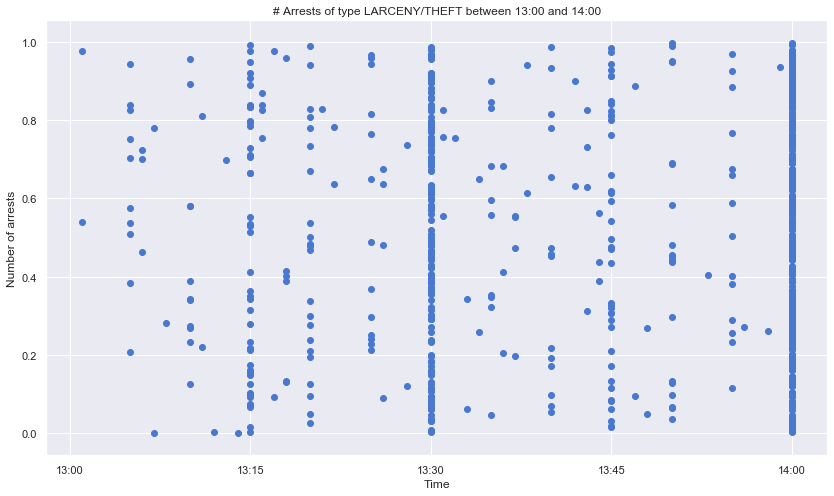

In [18]:
# Using plt.scatter to plot the jitter plot
fig = plt.figure(figsize=(14,8))
plt.scatter(x,y)
plt.title('# Arrests of type LARCENY/THEFT between 13:00 and 14:00');
plt.xlabel('Time')
plt.ylabel('Number of arrests')
plt.xticks(['13:00','13:15','13:30','13:45','14:00']);  
#fig.autofmt_xdate(0)

In the plot above, we can see a high amount of Larceny/Theft crimes being reported with a fixed 15min interval, with an even higher density at 13:30 and 14:00. As such, the hypothesis that police officers are prone to round the arrest time can clearly be seen.

### Histograms

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

Choosing Narcotics and Vehicle Theft as crime types and looking at their histograms

In [19]:
# Creating two dataframes, in which the relevant crime type is extracted
df_GTA = df_03_17[df_03_17['Category'] == 'VEHICLE THEFT']
df_Drugs = df_03_17[df_03_17['Category'] == 'DRUG/NARCOTIC']

In [20]:
# Extracting only six months of data from January 2003 to June 2003 in each dataframe
mask = (df_GTA['Date'] > '2003-01-01') & (df_GTA['Date'] <= '2003-06-01')
df_GTAsort = df_GTA.loc[mask]
mask = (df_Drugs['Date'] > '2003-01-01') & (df_Drugs['Date'] <= '2003-06-01')
df_Drugssort = df_Drugs.loc[mask]

In [21]:
# Extracting a list of the latitude column from each dataframe
lats_drugs = df_Drugssort.Y.to_list()
lats_thefts = df_GTAsort.Y.to_list()

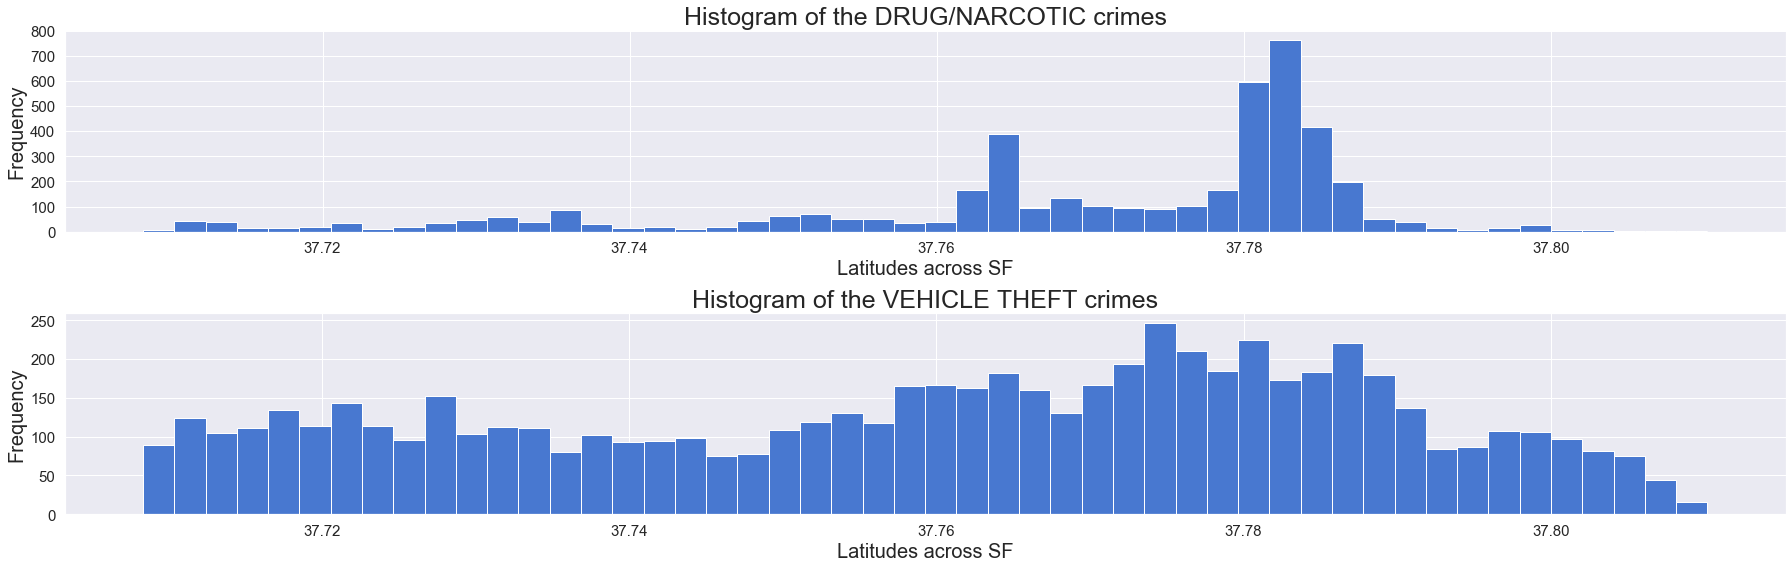

In [27]:
# Plotting the two histograms.
plt.figure(figsize=(25,8))
plt.subplot(2,1,1)
hist_drugs = plt.hist(lats_drugs,bins = 50)
plt.xlabel('Latitudes across SF',fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel('Frequency',fontsize = 20)
plt.yticks(fontsize=15)
plt.title('Histogram of the DRUG/NARCOTIC crimes',fontsize = 25)

plt.subplot(2,1,2)
hist_thefts = plt.hist(lats_thefts, bins = 50)
plt.xlabel('Latitudes across SF',fontsize = 20)
plt.xticks(fontsize=15) 
plt.ylabel('Frequency',fontsize = 20)
plt.yticks(fontsize=15)
plt.title('Histogram of the VEHICLE THEFT crimes', fontsize = 25)

plt.tight_layout()
plt.show()

Looking at the two histograms, we can see an almost gaussian like behaviour in the Drug/Narcotic data, centered around aprroximately 37.785. However, we can also see a peak around 37.765, which indicates that we cannot model this using an assumption of gaussian distributed data.

The histogram for the Vehicle theft crimes can be seen to be somewhat constant all over the city, with a slight increase around 37.785, the same area in which the Drug/Narcotic crimes peak. So, based on these two primitive visualization tools, we can see that the two crimes are comitted more in that area.

## Kernel Density Estimates
* Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In [261]:
# Here, we extract the index of the sorted dataframe, which contains the time of arrests of type Larceny/Theft
x = df_theft_sorted.index.to_list()

In [28]:
# We convert the datetimes to strings, which we then split up, such that we can sum the total number of seconds since a 
# crime occured since midnight. 
k = [str(x) for x in df_theft_sorted.index]
t = [sum(x * int(t) for x, t in zip([3600,60,1],elem.split(':'))) for elem in k]

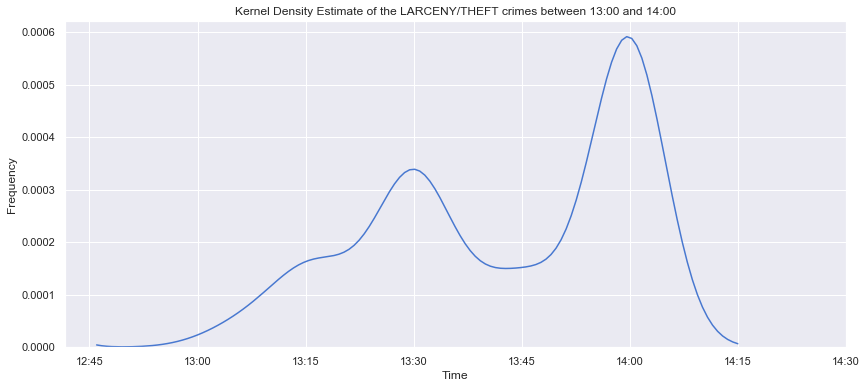

In [29]:
# Plotting the Kernel Density Estimate using sns.kdeplot
plt.figure(figsize=(14,6))
sns.kdeplot(t);
plt.xlabel('Time');
plt.ylabel('Frequency');
plt.xticks([45900,46800, 47700, 48600, 49500, 50400, 51300,52200], ['12:45','13:00','13:15','13:30','13:45','14:00','14:15','14:30']) # CRUCIAL LINE
plt.title('Kernel Density Estimate of the LARCENY/THEFT crimes between 13:00 and 14:00');

Here, we can also see, same as the jitter plot, the structure of rounding the arrest times to nearest quarter/half hour. However, as the KDE attempts to fit a gaussian kernel to the data, the underlying structure becomes blurred, and specifically the 13:15 and 13:45 arrest times, if one only looked at this plot, would be hard to notice.

* Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading? 

Drawing 25 random samples from the time of crimes from the data frame and plotting the KDE of that

In [32]:
x_rand = df_theft_sorted.sample(25).index.to_list()

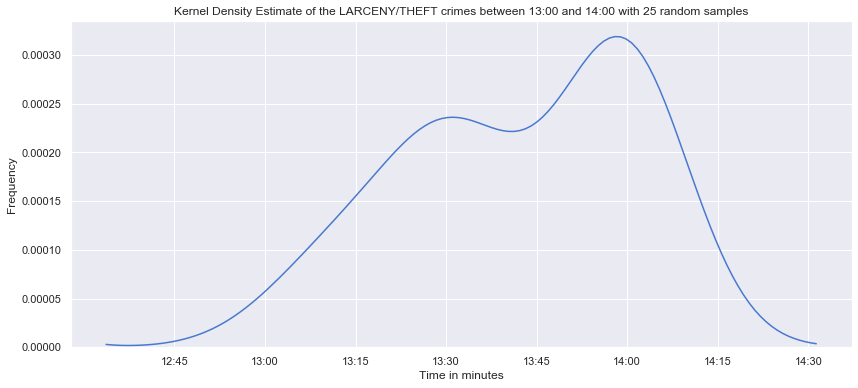

In [33]:
# Same procedure as above
k = [str(x) for x in x_rand]
t = [sum(x * int(t) for x, t in zip([3600,60,1],elem.split(':'))) for elem in k]
plt.figure(figsize=(14,6))
sns.kdeplot(t);
plt.xlabel('Time in minutes');
plt.xticks([45900,46800, 47700, 48600, 49500, 50400, 51300,52200], ['12:45','13:00','13:15','13:30','13:45','14:00','14:15','14:30']) # CRUCIAL LINE
plt.ylabel('Frequency');
plt.title('Kernel Density Estimate of the LARCENY/THEFT crimes between 13:00 and 14:00 with 25 random samples');

As seen in the plot above, the KDE becomes very smoothed out, when the number of samples used is decreased. This makes the underlying structure even harder to see, even with little data. One should therefore exercise caution when attempting to conclude something from the KDE plot, when there is introduced such a large amount of human bias.

Remember to try to run the sampling a couple of times, so that you can see the KDE plot change drastically.

## Part 5: Heatmaps of geo-data

First a plot of San Fransisco is shown below with a marker for City Hall. 

In [34]:
# Initialize map
mapz = folium.Map([37.773972, -122.431297], zoom_start=13,tiles = 'Stamen Toner')

# Add marker to the map
folium.Marker([37.77919, -122.4191], 
              popup='SF City Hall',
              icon=folium.Icon(color='red',icon='university', prefix='fa') 
             ).add_to(mapz)
# Display map
mapz

We load out dataframe and look at the DRUG/NARCOTIC crimes and filter out a month in 2016. Then we make a circle marker for each crime. 

In [35]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_drug = df[df['Category'] == 'DRUG/NARCOTIC']
mask = (df_drug['Date'] > '15/06/2016') & (df_drug['Date'] <= '15/07/2016')
df_drug = df_drug.loc[mask]

In [36]:
# For each point the the dataframe create a marker on the map. 
for i in range(len(df_drug)):
    folium.CircleMarker([df_drug.Y.iloc[i], df_drug.X.iloc[i]],fill=True, # Set fill to True
                                fill_color='blue',
                                color = 'blue',
                                radius = 6
                 ).add_to(mapz)
# Display map
mapz

### Heatmaps

In [37]:
df_sexoff = df_03_17[df_03_17['Category'] == 'SEX OFFENSES, NON FORCIBLE']

In [38]:
from folium import plugins
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[37.77919, -122.41914],zoom_start = 13) 

# Filter the DF for rows, then columns, then remove NaNs
df_sexoff = df_sexoff[['Y', 'X']]
df_sexoff = df_sexoff.dropna(axis=0, subset=['Y','X'])

# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in df_sexoff.iterrows()]

# Plot it on the map
HeatMap(heat_data,radius = 25, maxzoom = 2).add_to(map_hooray)

# Display the map
map_hooray

### Scatter vs heatmap





In [39]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df_burg = df[df['Category'] == 'BURGLARY']


In [40]:
mask = (df_burg['Date'] > '08/01/2015') & (df_burg['Date'] <= '10/01/2015')
df_burg2015 = df_burg.loc[mask]

In [42]:
import warnings
warnings.filterwarnings("ignore")

map_hooray = folium.Map(location=[37.77919, -122.41914],zoom_start = 13) 

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_burg2015[['Y', 'X']]

# Create weight column, using date
heat_df['Weight'] = df_burg2015['Time'].str[0:2] # extracting the date from the string
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Y','X', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['Y'],row['X']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,23)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map_hooray)
# Display the map
map_hooray

### Discuss results

**Motivate/explain the reasoning behind your choice of crimetype and time-resolution.**

We chose burglaries, as it is a focus crime, and chose the hours of the day, as it would be interesting to see how the number of burglaries, and perhaps the location of them, changed during the course of the day. This can be seen in the heap map above, where each tick represents the corresponding hour of the day.


**What patterns does your movie reveal?**

Based on the movie, we can see an increase in the number of burglaries reported around 18:00 which lasts until around 21:00 and is centered in downtown SF. An explanation for this, could be that the burglary itself is conducted during the workhours of the day, and when people get home from work, they report it.

The burglaries are centered in the districts Tenderloin, SOMA and Mid Market, which contains warehouse, restaurants, art venues and a number of different night life activities. This could also explain why it is a hotspot for burglaries, as many valuable items quite possibly are stored in buildings in these districs.



## Part 6: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the hourly activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png).

> *Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.
>
>This last exercise for today has two parts.
> * In each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
> * (Optional) Find your own example of human noise in the data and visualize it.

**Prostitution activity on thursday**
If you are trying to find a pattern in prostitution throughout the week you would need low enough bin size (high amount of bins) to reveal the bias in the data. If your bin size is to large you would see an even distribution of activity throughout the week, however with small bin sizes the noise in the reported data would show more clearly. 

If you dont know how these crimes are reported you could assume that thursday is a high activity day for prostitution. However this could be due to the reporting bias coming from for example targeted police actions towards prostitution every thursday. 


**Recording of crimes at different times**

Binning this data would for a crude amount of bins show a sort of flat distribution over the different times. Increasing the number of bins would reveal more and more of the "spikes" at the time where most crimes are recorded. 



**Hall of Justice**
Again, this would lead to high bins at the Hall of Justice location even though there might be no correlation at all. 


For all of these three cases, these bias on the data can quite significantly affect conclusions around crime patterns in San Fransisco. Areas/times/locations might be analyzed to be a center of a specific crime type, when in reality its caused by human bias.
